In [1]:
# Importing necessary libararies

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense,Dropout, Embedding, LSTM, CuDNNLSTM, SpatialDropout1D,GRU, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn import svm
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from bs4 import BeautifulSoup
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.preprocessing.text import Tokenizer #A text tokenizer to vectorize a text corpus
from tensorflow.keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix
# from sklearn.metrics import make_scorer
import time as time
from sklearn import metrics
import scipy.stats
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from collections import Counter
from nltk.corpus import stopwords
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
import re
from collections import defaultdict

nltk.download("stopwords") 
nltk.download("vader_lexicon")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# importing databaset from UCI Website

In [4]:
data_train = pd.read_csv('drugsComTrain_raw.tsv',sep='\t')
data_test = pd.read_csv('drugsComTest_raw.tsv',sep='\t')

In [5]:
# Examine the size of train and test dataset

In [6]:
print(f'The size of training dataset is: {data_train.shape} and the size of test dataset is {data_test.shape}')

The size of training dataset is: (161297, 7) and the size of test dataset is (53766, 7)


# Overview of ten samples from the training dataset

In [7]:
data_train.sample(10)

Unnamed: 0                         drugName  \
112627      108865                        Nexplanon   
74088        86993                           Latuda   
18242       100215  Desogestrel / ethinyl estradiol   
86474       139578                            Luvox   
150893      133816                         Restasis   
20328       165498                   Levonorgestrel   
50584        58122      Acetaminophen / hydrocodone   
50335       171180                          Levitra   
7529        201597                           Zoloft   
130049       94888                          Abilify   

                             condition  \
112627                   Birth Control   
74088                    Schizophrenia   
18242                    Birth Control   
86474     Obsessive Compulsive Disorde   
150893      Keratoconjunctivitis Sicca   
20328                    Birth Control   
50584                            Cough   
50335             Erectile Dysfunction   
7529    Premenstrual Dysphoric Disorde   
130049                 Bipolar Disorde   

                                                   review  rating  \
112627  "I had my arm implant on May 07 20015 a month ...     4.0   
74088   "40mg for Schizoaffective Disorder: Somewhat i...     3.0   
18242   "I have been on this pill for over three years...     6.0   
86474   "This medicine saved my life. Racing thoughts ...    10.0   
150893  "Just started the medication, &amp; I understa...     1.0   
20328   "I&#039;m rating an 8 based on the insert. I t...     8.0   
50584   "It definitely helps. It takes the itchiness o...    10.0   
50335   "Works very well. Using 20mg it usually starts...     9.0   
7529    "I started Zoloft in July.  I never wanted to ...     9.0   
130049  "I have been on Abilify for 5 years. I take 15...     8.0   

                     date  usefulCount  
112627      July 19, 2017            7  
74088      April 11, 2016           18  
18242    November 1, 2015            3  
86474   February 12, 2009          153  
150893  November 24, 2017            1  
20328        June 8, 2017            1  
50584      April 27, 2009           36  
50335         May 5, 2013           64  
7529    December 12, 2013          134  
130049  December 26, 2010           13

# Ten Samples from testing dataset

In [8]:
data_test.sample(10)

Unnamed: 0                drugName                  condition  \
5242       193562         Cyclobenzaprine               Muscle Spasm   
49935      224827               Bupropion          Smoking Cessation   
44151       29520              Topiramate        Migraine Prevention   
17625      158550         Methylphenidate                       ADHD   
46450      123406                    Apri  Polycystic Ovary Syndrome   
45989      184771           Canagliflozin           Diabetes, Type 2   
30260       35407            Levofloxacin                 Bronchitis   
16724      161675         Diphenhydramine                   Insomnia   
30954       54604  Bupropion / naltrexone                Weight Loss   
28028       69257                Celebrex                       Pain   

                                                  review  rating  \
5242   "Flexeril is a good muscle spasm medication fo...     5.0   
49935  "I have smoked since I was 12 yrs old. Started...     6.0   
44151  "Life long migraines that were becoming more s...    10.0   
17625  "I have 3 children, 2 of whom are on Concerta....    10.0   
46450  "I have been taking Apri for the last month an...    10.0   
45989  "I took this drug for 6 days. On the third day...     1.0   
30260  "Dosage was 500 mg for 10 days. Stopped after ...     1.0   
16724  "My doctor had prescribed Ambien.  Before taki...     8.0   
30954  "I started Contrave on 5-6 and first week in a...     9.0   
28028  "I went they 2 years of hell with lower back p...    10.0   

                    date  usefulCount  
5242     October 3, 2009           30  
49935   January 11, 2017            9  
44151  February 19, 2015           36  
17625  November 24, 2013           42  
46450  November 27, 2010           17  
45989   November 9, 2017            0  
30260  December 25, 2009           27  
16724     March 17, 2013           17  
30954       May 22, 2017           22  
28028     August 3, 2015           73

# Joining the two dataset for the purpose of cleaning

In [9]:
df = pd.concat([data_train,data_test])

# Total population of the dataset after merging

In [10]:
print(f'The total sample size of the dataset before cleaning: {df.shape}')

The total sample size of the dataset before cleaning: (215063, 7)


# Data Explorative Analysis & Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [12]:
# The dataset consistts of 2 integer type variables, 4 non-numeric type variable and 1 decimal type variable

In [13]:
# Evaluate the first ten rows of the combine dataset

In [14]:
df.head(10)

Unnamed: 0                            drugName  \
0      206461                           Valsartan   
1       95260                          Guanfacine   
2       92703                              Lybrel   
3      138000                          Ortho Evra   
4       35696            Buprenorphine / naloxone   
5      155963                              Cialis   
6      165907                      Levonorgestrel   
7      102654                        Aripiprazole   
8       74811                              Keppra   
9       48928  Ethinyl estradiol / levonorgestrel   

                      condition  \
0  Left Ventricular Dysfunction   
1                          ADHD   
2                 Birth Control   
3                 Birth Control   
4             Opiate Dependence   
5  Benign Prostatic Hyperplasia   
6       Emergency Contraception   
7               Bipolar Disorde   
8                      Epilepsy   
9                 Birth Control   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   
5  "2nd day on 5mg started to work with rock hard...     2.0   
6  "He pulled out, but he cummed a bit in me. I t...     1.0   
7  "Abilify changed my life. There is hope. I was...    10.0   
8  " I Ve had  nothing but problems with the Kepp...     1.0   
9  "I had been on the pill for many years. When m...     8.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37  
5  November 28, 2015           43  
6      March 7, 2017            5  
7     March 14, 2015           32  
8     August 9, 2016           11  
9   December 8, 2016            1

In [15]:
# Examine Statistical Variables

In [16]:
df.describe()

Unnamed: 0         rating    usefulCount
count  215063.000000  215063.000000  215063.000000
mean   116039.364814       6.990008      28.001004
std     67007.913366       3.275554      36.346069
min         0.000000       1.000000       0.000000
25%     58115.500000       5.000000       6.000000
50%    115867.000000       8.000000      16.000000
75%    173963.500000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

# The average rating is 6.99 from the maximum rating of 10 which implies that there are alot of positive user's rating for some drugs while fews drugs had bad rating indicating the need to subject them for thorough scientific research

In [17]:
# Examine the most frequent drugs by referencing

In [18]:
df.describe(include='all')

Unnamed: 0        drugName      condition  review         rating  \
count   215063.000000          215063         213869  215063  215063.000000   
unique            NaN            3671            916  128478            NaN   
top               NaN  Levonorgestrel  Birth Control  "Good"            NaN   
freq              NaN            4930          38436      39            NaN   
mean    116039.364814             NaN            NaN     NaN       6.990008   
std      67007.913366             NaN            NaN     NaN       3.275554   
min          0.000000             NaN            NaN     NaN       1.000000   
25%      58115.500000             NaN            NaN     NaN       5.000000   
50%     115867.000000             NaN            NaN     NaN       8.000000   
75%     173963.500000             NaN            NaN     NaN      10.000000   
max     232291.000000             NaN            NaN     NaN      10.000000   

                 date    usefulCount  
count          215063  215063.000000  
unique           3579            NaN  
top     March 1, 2016            NaN  
freq              185            NaN  
mean              NaN      28.001004  
std               NaN      36.346069  
min               NaN       0.000000  
25%               NaN       6.000000  
50%               NaN      16.000000  
75%               NaN      36.000000  
max               NaN    1291.000000

In [19]:
## Checking commonly used drug, the condition to which it was used and the number of patients treated

In [20]:
df['drugName'].value_counts()

Levonorgestrel                       4930
Etonogestrel                         4421
Ethinyl estradiol / norethindrone    3753
Nexplanon                            2892
Ethinyl estradiol / norgestimate     2790
                                     ... 
Melpaque HP                             1
Cortisone                               1
Reyataz                                 1
Striant                                 1
Allergy DN PE                           1
Name: drugName, Length: 3671, dtype: int64

In [21]:
levono_user = df[df['drugName']=="Levonorgestrel"][['condition','usefulCount']]

In [22]:
levono_user

condition  usefulCount
6      Emergency Contraception            5
83               Birth Control           10
113              Birth Control            1
139              Birth Control            2
144              Birth Control            4
...                        ...          ...
53680  Emergency Contraception           10
53690            Birth Control            3
53729  Emergency Contraception            7
53741            Birth Control          140
53763            Birth Control            7

[4930 rows x 2 columns]

In [23]:
non_levon_user = df[df['drugName']!="Levonorgestrel"][['condition','usefulCount']]

In [24]:
non_levon_user

condition  usefulCount
0      Left Ventricular Dysfunction           27
1                              ADHD          192
2                     Birth Control           17
3                     Birth Control           10
4                 Opiate Dependence           37
...                             ...          ...
53760                 Birth Control           18
53761     Breast Cancer, Prevention           43
53762                       Anxiety           11
53764                          Pain           20
53765                      Sciatica           46

[210133 rows x 2 columns]

In [25]:
print(f'The statistics of Levonorgestrel users: {round((len(levono_user)/len(non_levon_user))*100,2)}%')

The statistics of Levonorgestrel users: 2.35%


# It can be inferred that Levonorgestrel is the most frequently used drugs for the treatment of birth control, emergency contraception and abnormal uterine bleeding. This implies that, there is an abuse of this drug which often results to an adverse reaction.

In [26]:
# Examine Missing Data 

In [27]:
df.isnull().sum()

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [28]:
# Visualization of missing data

<AxesSubplot:>

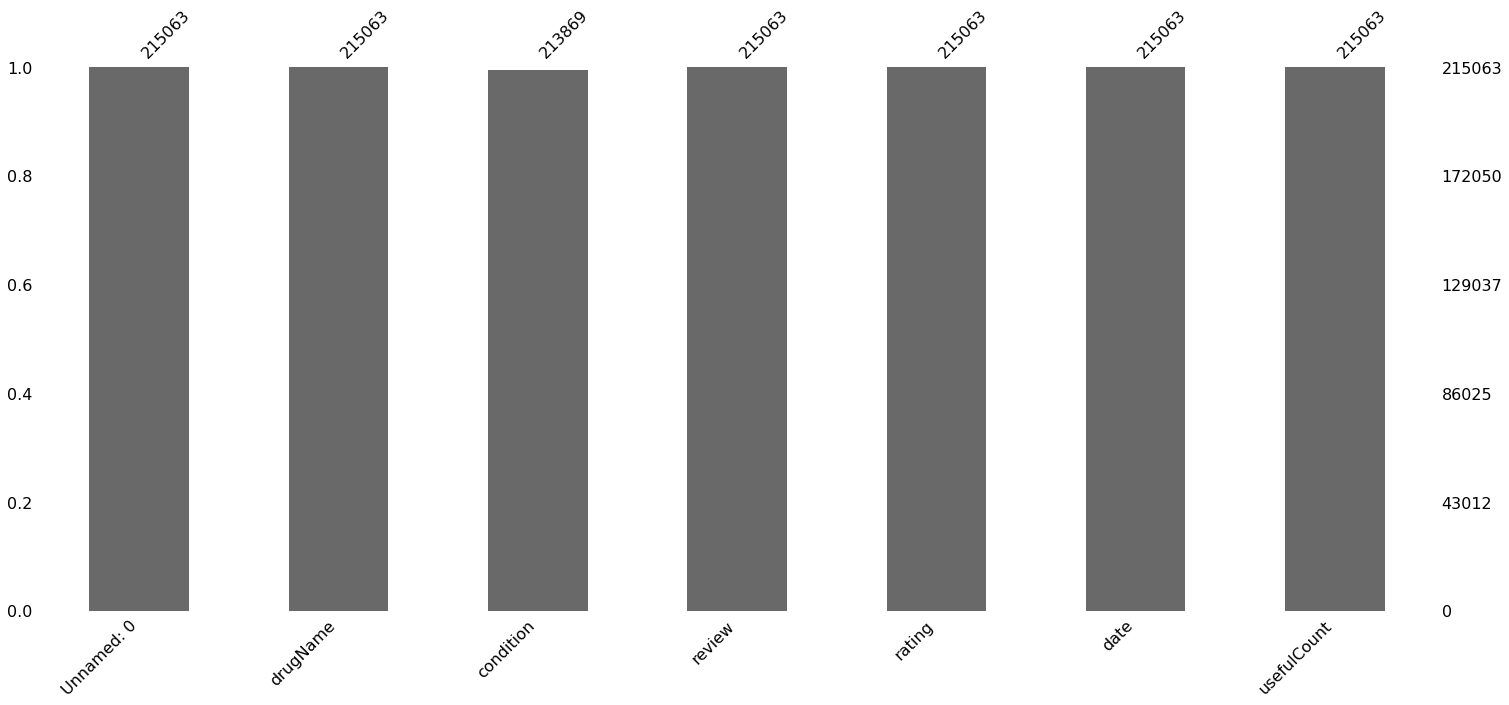

In [29]:
msno.bar(df)

# Visualization of the distributing of missing data

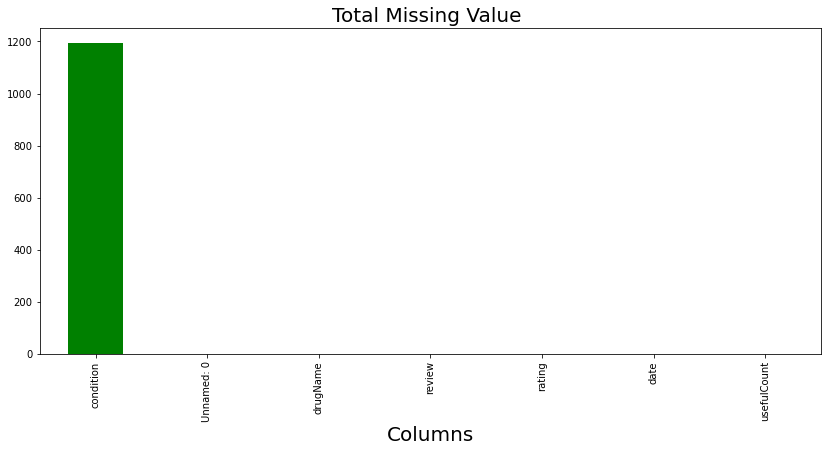

In [30]:
percent = (df.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)
plt.show()

# Condition variable contains most  of the missing data which implies that some people may not know their health condition by name or may not want to disclose their health condition

# Calculate the statistics of missing values

In [31]:
print("Missing value (%):", 1200/df.shape[0] *100)

Missing value (%): 0.5579760349292998


# Since the total missing value is less than 1% of the total dataset, we drop the missing values

In [32]:
# Deleting missing data

In [33]:
df.dropna(axis=0, inplace=True)

# Data Cleaning

# Examine condition variable for cleaning

In [34]:
df.condition.unique().tolist()

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Opiate Dependence',
 'Benign Prostatic Hyperplasia',
 'Emergency Contraception',
 'Bipolar Disorde',
 'Epilepsy',
 'Migraine Prevention',
 'Depression',
 "Crohn's Disease",
 'Cough',
 'Obesity',
 'Urinary Tract Infection',
 'ibromyalgia',
 'Chronic Myelogenous Leukemia',
 'HIV Infection',
 'Insomnia',
 'Rheumatoid Arthritis',
 'Vaginal Yeast Infection',
 'Chlamydia Infection',
 'Hirsutism',
 'Panic Disorde',
 'Migraine',
 'Pain',
 'Irritable Bowel Syndrome',
 'Osteoarthritis',
 'Constipation',
 'Bowel Preparation',
 'Psychosis',
 'Muscle Spasm',
 'Hepatitis C',
 'Overactive Bladde',
 'Diabetes, Type 2',
 'Asthma, Maintenance',
 'Non-Small Cell Lung Cance',
 'Schizophrenia',
 'Dysuria',
 'Smoking Cessation',
 'Anxiety',
 'Acne',
 'emale Infertility',
 'Constipation, Acute',
 'Constipation, Drug Induced',
 'Erectile Dysfunction',
 'Trigeminal Neuralgia',
 'Underactive Thyroid',
 'Chronic Pain',
 'Atrophic Vaginitis',
 'Skin an

# The condition variable contains NAN, '</ span>', Not Listed/Othe values for cleaning

In [35]:
# Evaluate the health condition with irrelevant data such as </span> regarded as noise
df.condition.str.contains('</span>').value_counts()

False    212698
True       1171
Name: condition, dtype: int64

# Examine the statistics of health condition containing </ span>

In [36]:
span_check = df[df['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_check))
noisy_data = 100 * (len(span_check)/df.shape[0])
noise = pd.DataFrame([len(span_check),noisy_data], index=['Span Rows', 'Statistics'], columns=['Noise'])
print('Total percent of noisy data {} %  '.format(noisy_data))

Number of rows with </span> values :  1171
Total percent of noisy data 0.5475314327929715 %  


In [37]:
# Analyse noise data in medical condition
noise

Noise
Span Rows   1171.000000
Statistics     0.547531

In [38]:
# Since the percentage of the noise data is less than 1% of the total dataset, we drop the rows with </ span> values

In [39]:
# Removal of Noise from the condition dataset
df.drop(span_check.index, axis = 0, inplace=True)

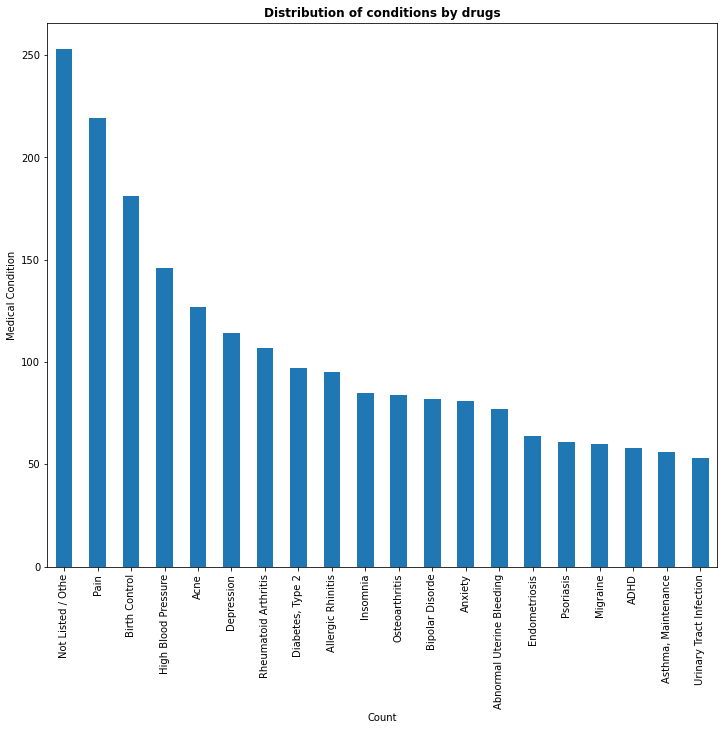

In [40]:

# A Further check on health condition for unwanted data
# Visualise health conditions by drugs
plt.figure(figsize=(12,10))
drugs_condition = df.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Medical Condition')
plt.xlabel('Count')
plt.title('Distribution of conditions by drugs', weight='bold')
plt.show()

# It can be visualised that Not Listed/Othe has the highest frequency of condition by drugs which requires cleaning

In [41]:
#check the percentage of 'not listed / othe' conditions
not_listed = df[df['condition'] == 'Not Listed / Othe']
print('Number of not_listed values : ', len(not_listed))
percent_not_listed = 100 * len(not_listed)/df.shape[0]
print('Total percent of noisy data: {} %  '.format(percent_not_listed))

Number of not_listed values :  590
Total percent of noisy data: 0.27813657920292656 %  


In [42]:
noise_not_listed = pd.DataFrame([len(not_listed),percent_not_listed], index=['Not Listed Rows', 'Statistics'], columns=['Not Listed Noise'])

In [43]:
# Unwanted medical conditions that could cause a noise for machine learning
noise_not_listed

Not Listed Noise
Not Listed Rows        590.000000
Statistics               0.278137

In [44]:
# There are 590 unique drugs for "not / listed othe " values. The availabe option is to drop the rows with unwanted data
# We will drop the values as these only accounts for 0.27 % of the total data. To save CPU processing time.
# Removal Not List/Othe in condition variable

# drop noisy data
df.drop(not_listed.index, axis = 0, inplace=True)

# Examine the review variable for cleaning

In [45]:
df.review.value_counts()

"Good"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         38
"Great"                                                                                                                                                                                                                               

In [46]:
# Removal of common stopwords

In [47]:
# removal of common stopwords
common_stopwords = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in common_stopwords:
    stop_words.remove(i)

# Using Beautiful Soup Library for data cleaning

In [48]:
# Normalise words into its base form or root form using SnowBallStemmer
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)

    # 3. lower letters
    words = letters_only.lower().split()

    # 5. Stopwords Removal
    meaningful_words = [w for w in words if not w in stop_words]
    
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [49]:
# Application of pre-processing function on review variable

In [50]:
%time df['review_clean'] = df['review'].apply(review_to_words)

CPU times: total: 3min 17s
Wall time: 3min 20s


# Data Preprocessing/Feature Engineering

In [51]:
#Word count in each review
df['count_word']=df["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count 
df['count_unique_word']=df["review_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["review_clean"].apply(lambda x: len(str(x)))

In [52]:
# Functions to obtain Review sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

# Function to determine sentiment label
def sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity>0:
        result ='Positive'
    else:
        result =  'Negative'
    return result

# Function to determine sentiment target variable
def sentiment_target(text):
    blob = TextBlob(text)
    if blob.polarity>0:
        result =1
    else:
        result =  0
    return result

In [53]:
# Comparing uncleaned review sentiment with cleaned review sentiment
df['sentiment'] = df['review'].apply(get_sentiment)

# Getting Review Sentiment Label
df['review_label'] = df['review'].apply(sentiment_label)

# Getting Cleaned Review Sentiment Label
df['review_clean_label'] = df['review_clean'].apply(sentiment_label)

# Getting cleaned review sentiment  
df['clean_review_sentiment'] = df['review_clean'].apply(get_sentiment)

# Obtain Sentiment labels forreview
df['review_polarity'] = df['review'].apply(sentiment_target)

# Obtain Sentiment labels for clean review
df['review_clean_polarity'] = df['review_clean'].apply(sentiment_target)

# Examine dataset after cleaning

In [54]:
df

Unnamed: 0                  drugName                     condition  \
0          206461                 Valsartan  Left Ventricular Dysfunction   
1           95260                Guanfacine                          ADHD   
2           92703                    Lybrel                 Birth Control   
3          138000                Ortho Evra                 Birth Control   
4           35696  Buprenorphine / naloxone             Opiate Dependence   
...           ...                       ...                           ...   
53761      159999                 Tamoxifen     Breast Cancer, Prevention   
53762      140714              Escitalopram                       Anxiety   
53763      130945            Levonorgestrel                 Birth Control   
53764       47656                Tapentadol                          Pain   
53765      113712                 Arthrotec                      Sciatica   

                                                  review  rating  \
0      "It has no side effect, I take it in combinati...     9.0   
1      "My son is halfway through his fourth week of ...     8.0   
2      "I used to take another oral contraceptive, wh...     5.0   
3      "This is my first time using any form of birth...     8.0   
4      "Suboxone has completely turned my life around...     9.0   
...                                                  ...     ...   
53761  "I have taken Tamoxifen for 5 years. Side effe...    10.0   
53762  "I&#039;ve been taking Lexapro (escitaploprgra...     9.0   
53763  "I&#039;m married, 34 years old and I have no ...     8.0   
53764  "I was prescribed Nucynta for severe neck/shou...     1.0   
53765                                      "It works!!!"     9.0   

                     date  usefulCount  \
0            May 20, 2012           27   
1          April 27, 2010          192   
2       December 14, 2009           17   
3        November 3, 2015           10   
4       November 27, 2016           37   
...                   ...          ...   
53761  September 13, 2014           43   
53762     October 8, 2016           11   
53763   November 15, 2010            7   
53764   November 28, 2011           20   
53765  September 13, 2009           46   

                                            review_clean  count_word  \
0          no side effect take combin bystol mg fish oil           9   
1      son halfway fourth week intuniv becam concern ...          65   
2      use take anoth oral contracept pill cycl happi...          71   
3      first time use form birth control glad went pa...          39   
4      suboxon complet turn life around feel healthie...          59   
...                                                  ...         ...   
53761  taken tamoxifen year side effect sever sweat d...          51   
53762  take lexapro escitaploprgram sinc februari fir...          72   
53763  marri year old no kid take pill hassl decid ge...          69   
53764  prescrib nucynta sever neck shoulder pain take...          18   
53765                                               work           1   

       count_unique_word  count_letters  sentiment review_label  \
0                      9             45   0.000000     Negative   
1                     54            371   0.168333     Positive   
2                     50            406   0.067210     Positive   
3                     26            225   0.179545     Positive   
4                     52            380   0.194444     Positive   
...                  ...            ...        ...          ...   
53761                 42            318   0.029762     Positive   
53762                 52            441   0.088547     Positive   
53763                 52            376  -0.081581     Negative   
53764                 16            107   0.000000     Negative   
53765                  1              4   0.000000     Negative   

      review_clean_label  clean_review_sentiment  review_polarity  \
0               Negat

Observe review sentiment

In [55]:
df[['review','review_polarity','review_label','review_clean','review_clean_polarity','review_clean_label']]

review  review_polarity  \
0      "It has no side effect, I take it in combinati...                0   
1      "My son is halfway through his fourth week of ...                1   
2      "I used to take another oral contraceptive, wh...                1   
3      "This is my first time using any form of birth...                1   
4      "Suboxone has completely turned my life around...                1   
...                                                  ...              ...   
53761  "I have taken Tamoxifen for 5 years. Side effe...                1   
53762  "I&#039;ve been taking Lexapro (escitaploprgra...                1   
53763  "I&#039;m married, 34 years old and I have no ...                0   
53764  "I was prescribed Nucynta for severe neck/shou...                0   
53765                                      "It works!!!"                0   

      review_label                                       review_clean  \
0         Negative      no side effect take combin bystol mg fish oil   
1         Positive  son halfway fourth week intuniv becam concern ...   
2         Positive  use take anoth oral contracept pill cycl happi...   
3         Positive  first time use form birth control glad went pa...   
4         Positive  suboxon complet turn life around feel healthie...   
...            ...                                                ...   
53761     Positive  taken tamoxifen year side effect sever sweat d...   
53762     Positive  take lexapro escitaploprgram sinc februari fir...   
53763     Negative  marri year old no kid take pill hassl decid ge...   
53764     Negative  prescrib nucynta sever neck shoulder pain take...   
53765     Negative                                               work   

       review_clean_polarity review_clean_label  
0                          0           Negative  
1                          1           Positive  
2                          1           Positive  
3                          1           Positive  
4                          1           Positive  
...                      ...                ...  
53761                      0           Negative  
53762                      1           Positive  
53763                      1           Positive  
53764                      0           Negative  
53765                      0           Negative  

[211247 rows x 6 columns]

In [56]:
# Determine the number of positive and negative review

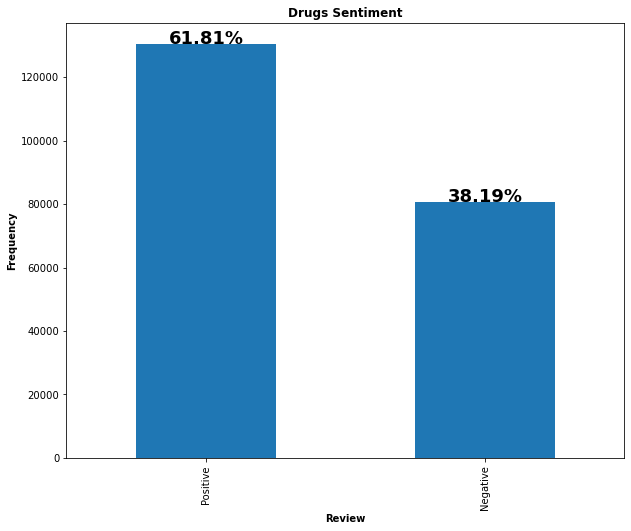

In [57]:
drug_sent = df.review_clean_label.value_counts().plot(kind='bar', figsize=(10,8))
plt.xlabel('Review', weight='bold')
plt.ylabel('Frequency',weight='bold')
plt.title('Drugs Sentiment', weight='bold')
for x in drug_sent.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.2f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

# Determine Good & Bad Rating

In [58]:
sia = SentimentIntensityAnalyzer()

In [59]:
# Run Polarity Score on the entire dataset
res ={}
for a, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    myid= row['Unnamed: 0']
    res[myid]=sia.polarity_scores(row['review_clean'])  

  0%|          | 0/211247 [00:00<?, ?it/s]

In [60]:
outcome = pd.DataFrame(res).T
outcome =  outcome.reset_index().rename(columns={'index':'Unnamed: 0'})
outcome = outcome.merge(df, how='left')

# Sentiment Score & other data

In [61]:
outcome

Unnamed: 0    neg    neu    pos  compound                  drugName  \
0           206461  0.216  0.784  0.000   -0.2960                 Valsartan   
1            95260  0.056  0.823  0.121    0.6929                Guanfacine   
2            92703  0.030  0.926  0.044    0.2732                    Lybrel   
3           138000  0.085  0.845  0.070    0.1027                Ortho Evra   
4            35696  0.073  0.707  0.219    0.8934  Buprenorphine / naloxone   
...            ...    ...    ...    ...       ...                       ...   
211242      159999  0.193  0.785  0.022   -0.8750                 Tamoxifen   
211243      140714  0.039  0.750  0.211    0.9140              Escitalopram   
211244      130945  0.245  0.755  0.000   -0.9501            Levonorgestrel   
211245       47656  0.383  0.617  0.000   -0.8519                Tapentadol   
211246      113712  0.000  1.000  0.000    0.0000                 Arthrotec   

                           condition  \
0       Left Ventricular Dysfunction   
1                               ADHD   
2                      Birth Control   
3                      Birth Control   
4                  Opiate Dependence   
...                              ...   
211242     Breast Cancer, Prevention   
211243                       Anxiety   
211244                 Birth Control   
211245                          Pain   
211246                      Sciatica   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   
2       "I used to take another oral contraceptive, wh...     5.0   
3       "This is my first time using any form of birth...     8.0   
4       "Suboxone has completely turned my life around...     9.0   
...                                                   ...     ...   
211242  "I have taken Tamoxifen for 5 years. Side effe...    10.0   
211243  "I&#039;ve been taking Lexapro (escitaploprgra...     9.0   
211244  "I&#039;m married, 34 years old and I have no ...     8.0   
211245  "I was prescribed Nucynta for severe neck/shou...     1.0   
211246                                      "It works!!!"     9.0   

                      date  ...  \
0             May 20, 2012  ...   
1           April 27, 2010  ...   
2        December 14, 2009  ...   
3         November 3, 2015  ...   
4        November 27, 2016  ...   
...                    ...  ...   
211242  September 13, 2014  ...   
211243     October 8, 2016  ...   
211244   November 15, 2010  ...   
211245   November 28, 2011  ...   
211246  September 13, 2009  ...   

                                             review_clean count_word  \
0           no side effect take combin bystol mg fish oil          9   
1       son halfway fourth week intuniv becam concern ...         65   
2       use take anoth oral contracept pill cycl happi...         71   
3       first time use form birth control glad went pa...         39   
4       suboxon complet turn life around feel healthie...         59   
...                                                   ...        ...   
211242  taken tamoxifen year side effect sever sweat d...         51   
211243  take lexapro escitaploprgram sinc februari fir...         72   
211244  marri year old no kid take pill hassl decid ge...         69   
211245  prescrib nucynta sever neck shoulder pain take...         18   
211246                                               work          1   

        count_unique_word  count_letters  sentiment  review_label  \
0                       9             45   0.000000      Negative   
1                      54            371   0.168333      Positive   
2                      50            406   0.067210      Positive   
3                      26            225   0.179545      Positive   
4                      52            380   0.194444      Positive   
...                   ...            ...        .

# Comparing Sentiment Score with Rating to determine genuine positive sentiment

In [62]:
# Determine genuine good rating per review

In [63]:
good_review = outcome[(outcome['rating']>=5) & (outcome['review_clean_label']=="Positive")]

In [64]:
## Show Sample of review
good_review.iloc[0][['drugName','review_clean']]

drugName                                               Guanfacine
review_clean    son halfway fourth week intuniv becam concern ...
Name: 1, dtype: object

# Visualize Genuine Good Review

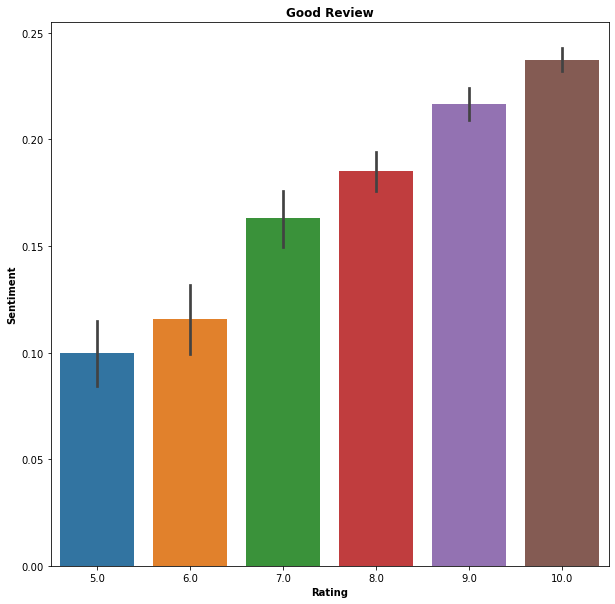

In [65]:
plt.figure(figsize=(10,10))
review_ok = sns.barplot(data=good_review,x='rating',y='compound')
plt.xlabel('Rating', weight='bold')
plt.ylabel('Sentiment', weight='bold')
plt.title('Good Review', weight='bold')
plt.show()

In [66]:
# Rating of 10 has the highest genuine sentiment

# Compare Sentiment Score with Rating to determine bad review

In [67]:
# Determine bad review per rating
bad_review = outcome[(outcome['rating']<5) & (outcome['review_clean_label']=="Negative")]

In [68]:
# Sample of Bad Review
bad_review.iloc[0][['drugName','review_clean']]

drugName                                                   Cialis
review_clean    nd day mg start work rock hard erect howev exp...
Name: 5, dtype: object

# Visualize Genuine Bad Review

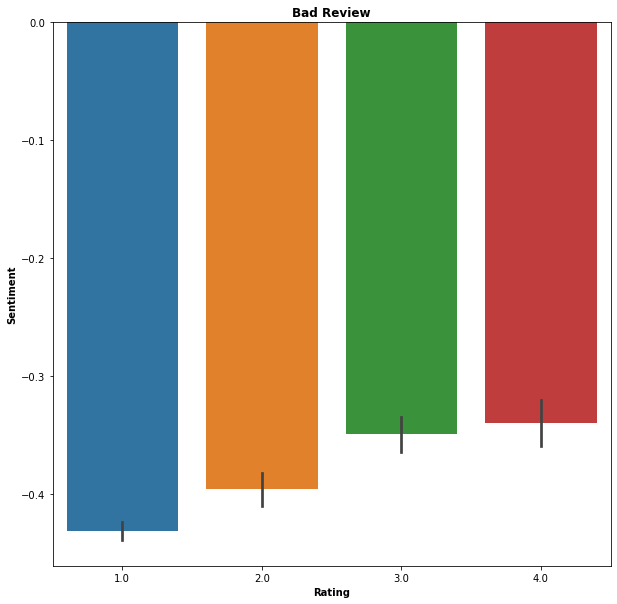

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(data=bad_review,x='rating',y='compound')
plt.xlabel('Rating', weight='bold')
plt.ylabel('Sentiment', weight='bold')
plt.title('Bad Review', weight='bold')
plt.show()

In [70]:
# Rating of  1.0 has the lowest genuine review

# Top 20 Genuine Drugs

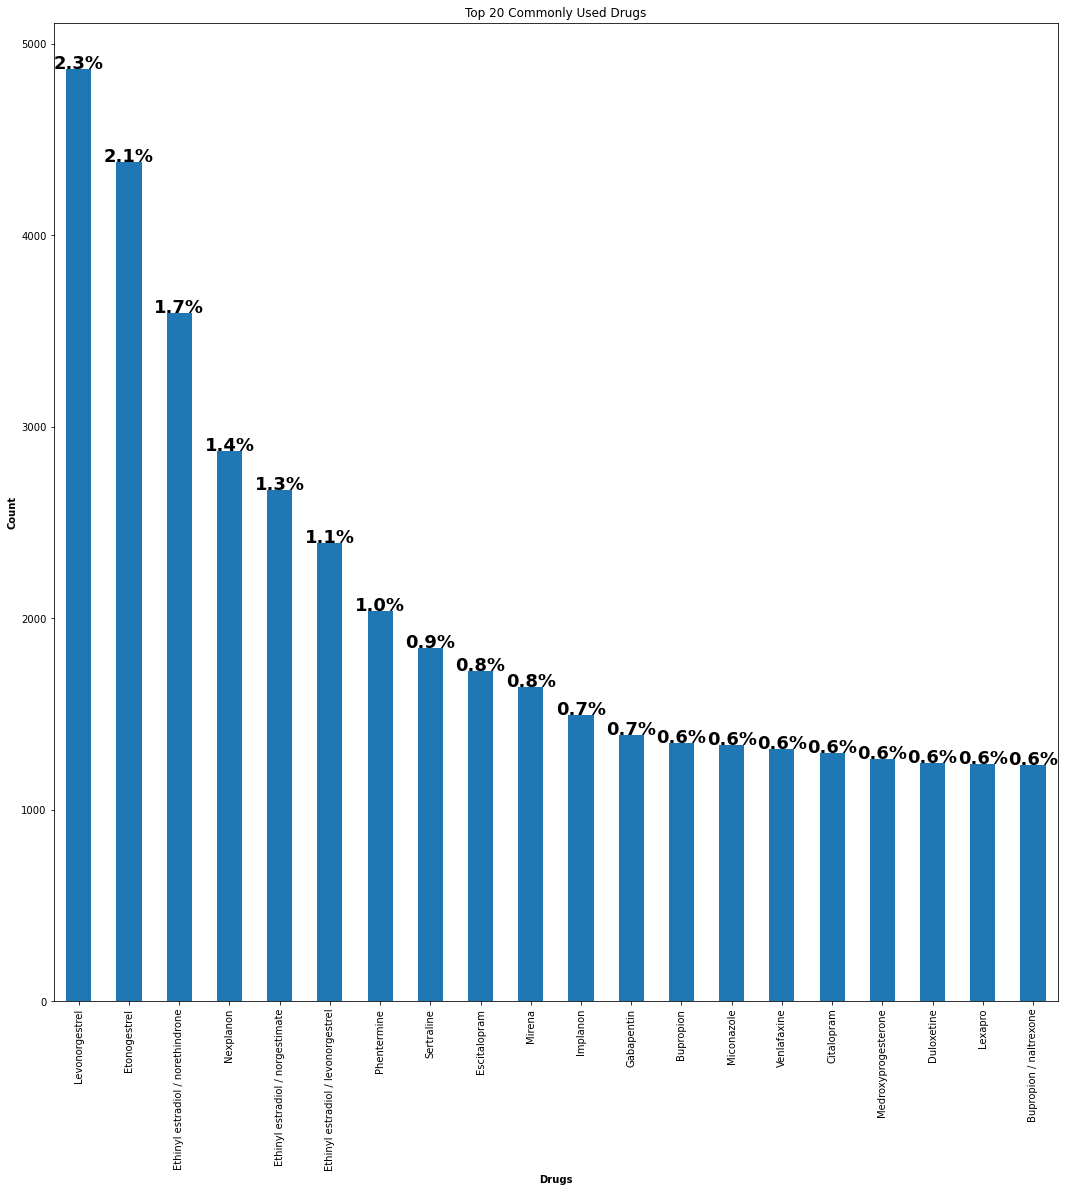

In [71]:
genuine_drugs = outcome['drugName'].value_counts().nlargest(20).plot(kind='bar', figsize=(18,18))
plt.xticks(rotation='90')
plt.xlabel('Drugs', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Top 20 Commonly Used Drugs')
for x in genuine_drugs.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(outcome))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

# Top 20 Genuine Positive Drugs

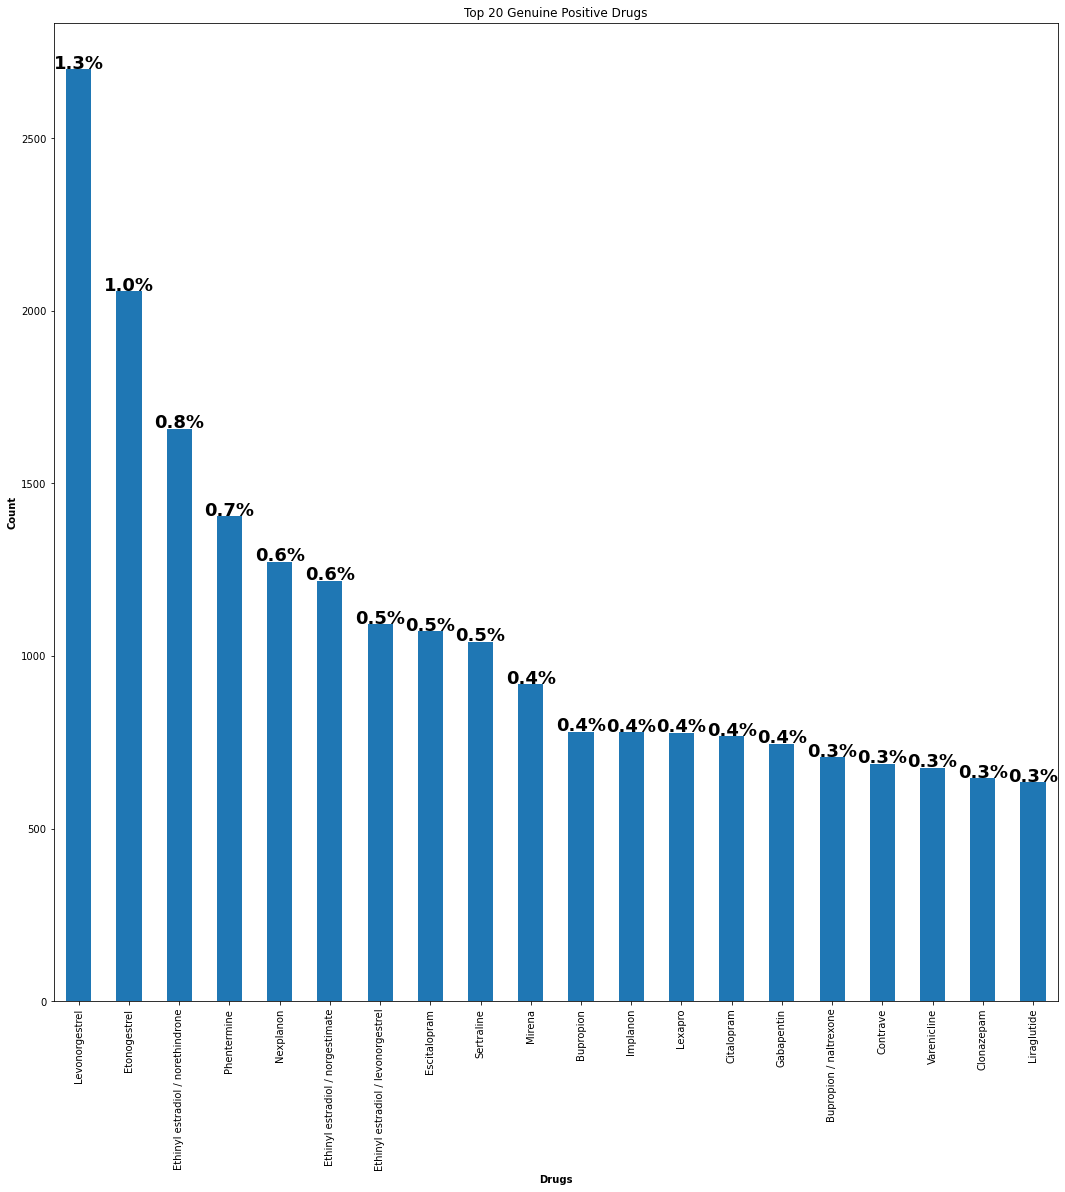

In [72]:
genuine_positive_drugs = outcome[(outcome['rating']>=5) & (outcome['review_clean_label']=="Positive")]['drugName'].value_counts().nlargest(20).plot(kind='bar', figsize=(18,18))
plt.xticks(rotation='90')
plt.xlabel('Drugs', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Top 20 Genuine Positive Drugs')
for x in genuine_positive_drugs.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(outcome))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

# Top 20 Genuine Negative Drugs

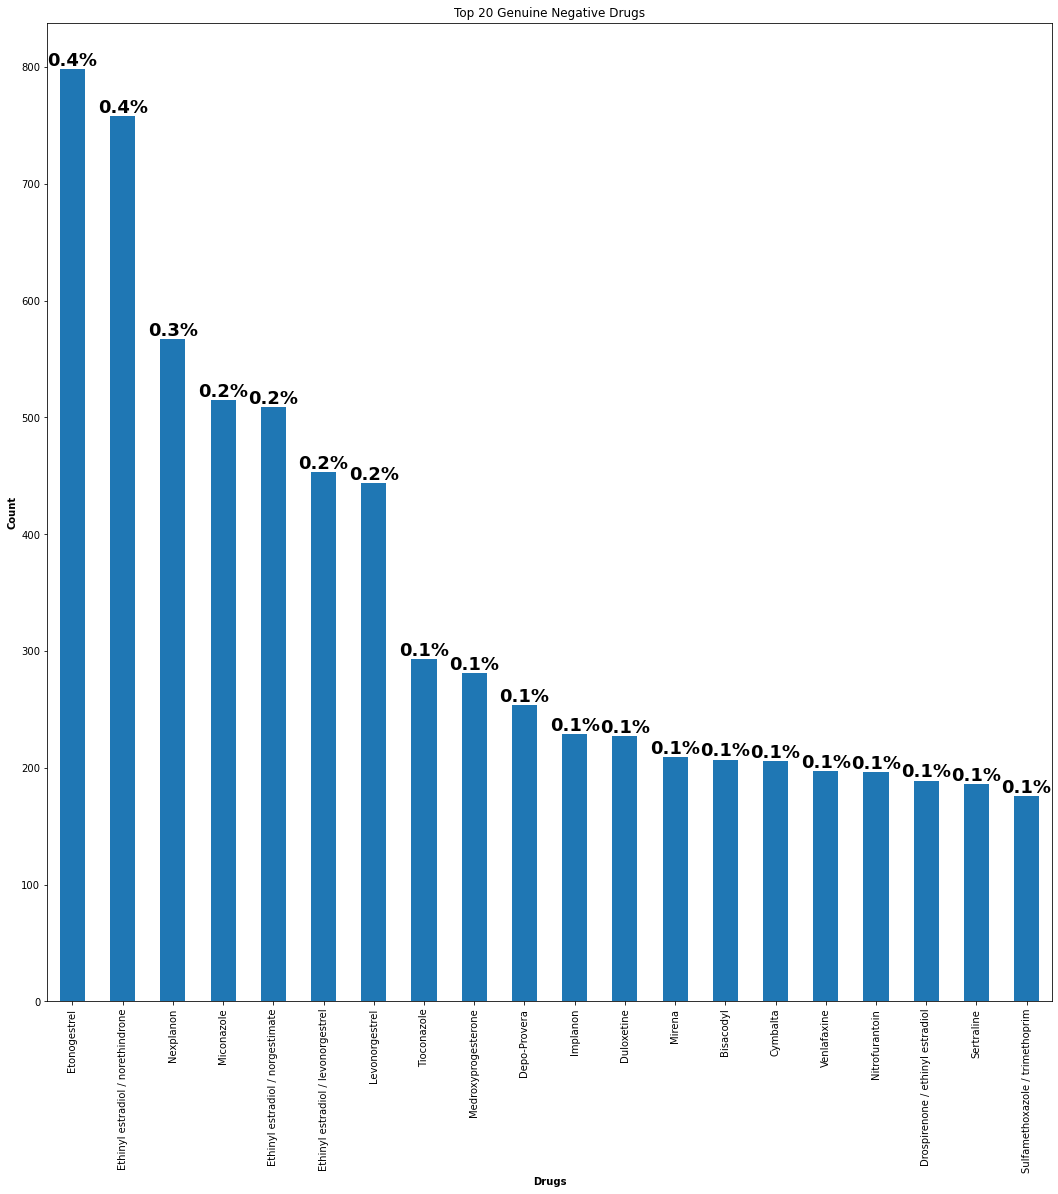

In [73]:
genuine_negative_drugs = outcome[(outcome['rating']<5) & (outcome['review_clean_label']=="Negative")]['drugName'].value_counts().nlargest(20).plot(kind='bar', figsize=(18,18))
plt.xticks(rotation='90')
plt.xlabel('Drugs', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Top 20 Genuine Negative Drugs')
for x in genuine_negative_drugs.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(outcome))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

In [74]:
# Making a new feature for review rating

df.loc[(df['rating'] >= 5), 'Rating_Label'] = 1
df.loc[(df['rating'] < 5), 'Rating_Label'] = 0

df['Rating_Label'].value_counts()

1.0    158594
0.0     52653
Name: Rating_Label, dtype: int64

# Extracting more features for date analysis

In [75]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year  #create year
df['month'] = df['date'].dt.month #create month
df['day'] = df['date'].dt.day #create day

In [76]:
df

Unnamed: 0                  drugName                     condition  \
0          206461                 Valsartan  Left Ventricular Dysfunction   
1           95260                Guanfacine                          ADHD   
2           92703                    Lybrel                 Birth Control   
3          138000                Ortho Evra                 Birth Control   
4           35696  Buprenorphine / naloxone             Opiate Dependence   
...           ...                       ...                           ...   
53761      159999                 Tamoxifen     Breast Cancer, Prevention   
53762      140714              Escitalopram                       Anxiety   
53763      130945            Levonorgestrel                 Birth Control   
53764       47656                Tapentadol                          Pain   
53765      113712                 Arthrotec                      Sciatica   

                                                  review  rating       date  \
0      "It has no side effect, I take it in combinati...     9.0 2012-05-20   
1      "My son is halfway through his fourth week of ...     8.0 2010-04-27   
2      "I used to take another oral contraceptive, wh...     5.0 2009-12-14   
3      "This is my first time using any form of birth...     8.0 2015-11-03   
4      "Suboxone has completely turned my life around...     9.0 2016-11-27   
...                                                  ...     ...        ...   
53761  "I have taken Tamoxifen for 5 years. Side effe...    10.0 2014-09-13   
53762  "I&#039;ve been taking Lexapro (escitaploprgra...     9.0 2016-10-08   
53763  "I&#039;m married, 34 years old and I have no ...     8.0 2010-11-15   
53764  "I was prescribed Nucynta for severe neck/shou...     1.0 2011-11-28   
53765                                      "It works!!!"     9.0 2009-09-13   

       usefulCount                                       review_clean  \
0               27      no side effect take combin bystol mg fish oil   
1              192  son halfway fourth week intuniv becam concern ...   
2               17  use take anoth oral contracept pill cycl happi...   
3               10  first time use form birth control glad went pa...   
4               37  suboxon complet turn life around feel healthie...   
...            ...                                                ...   
53761           43  taken tamoxifen year side effect sever sweat d...   
53762           11  take lexapro escitaploprgram sinc februari fir...   
53763            7  marri year old no kid take pill hassl decid ge...   
53764           20  prescrib nucynta sever neck shoulder pain take...   
53765           46                                               work   

       count_word  count_unique_word  ...  sentiment  review_label  \
0               9                  9  ...   0.000000      Negative   
1              65                 54  ...   0.168333      Positive   
2              71                 50  ...   0.067210      Positive   
3              39                 26  ...   0.179545      Positive   
4              59                 52  ...   0.194444      Positive   
...           ...                ...  ...        ...           ...   
53761          51                 42  ...   0.029762      Positive   
53762          72                 52  ...   0.088547      Positive   
53763          69                 52  ...  -0.081581      Negative   
53764          18                 16  ...   0.000000      Negative   
53765           1                  1  ...   0.000000      Negative   

      review_clean_label clean_review_sentiment  review_polarity  \
0               Negative               0.000000                0   
1               Positive               0.114583                1   
2               Positive               0.105000                1   
3               Positive               0.300000                1   
4               Positive               0.147037                1   
...    

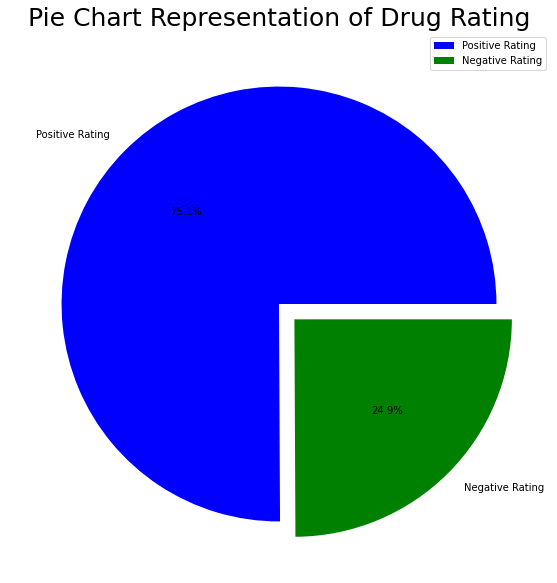

In [77]:
# a pie chart to represent the rating of the patients

size = [158594, 52653]
colors = ['blue', 'green']
labels = "Positive Rating","Negative Rating"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.1f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Drug Rating', fontsize = 25)
plt.legend()
plt.show()

In [78]:
# Word Cloud on drug review

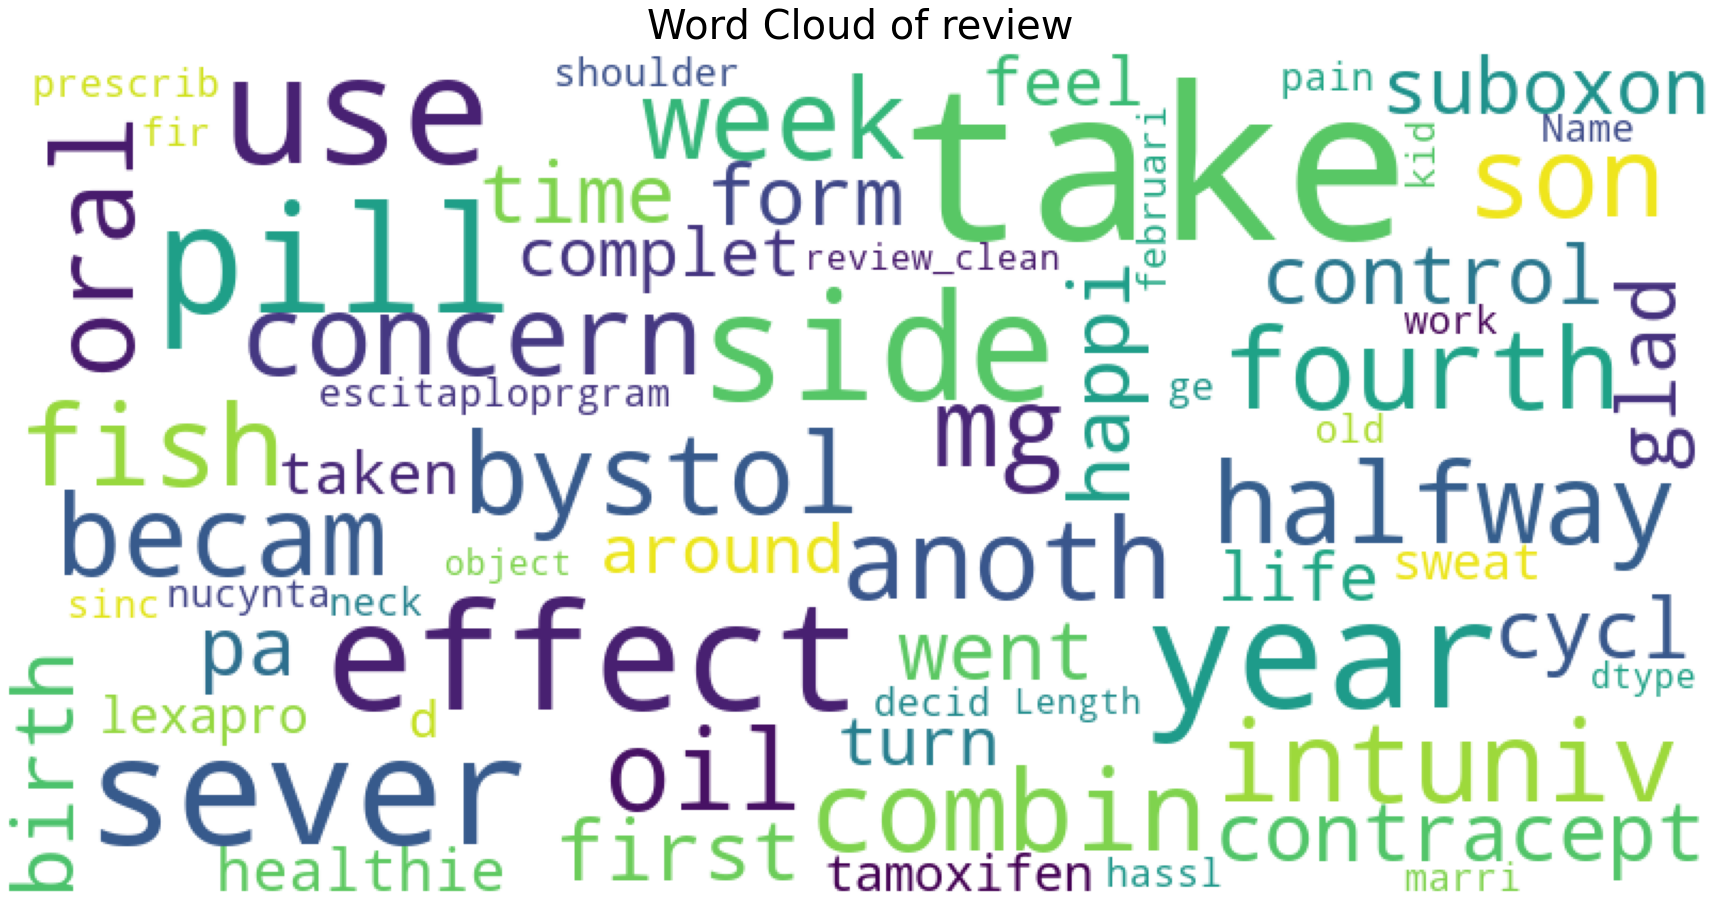

In [79]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc kernel 
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df["review_clean"], title="Word Cloud of review")

# Positive Word Cloud

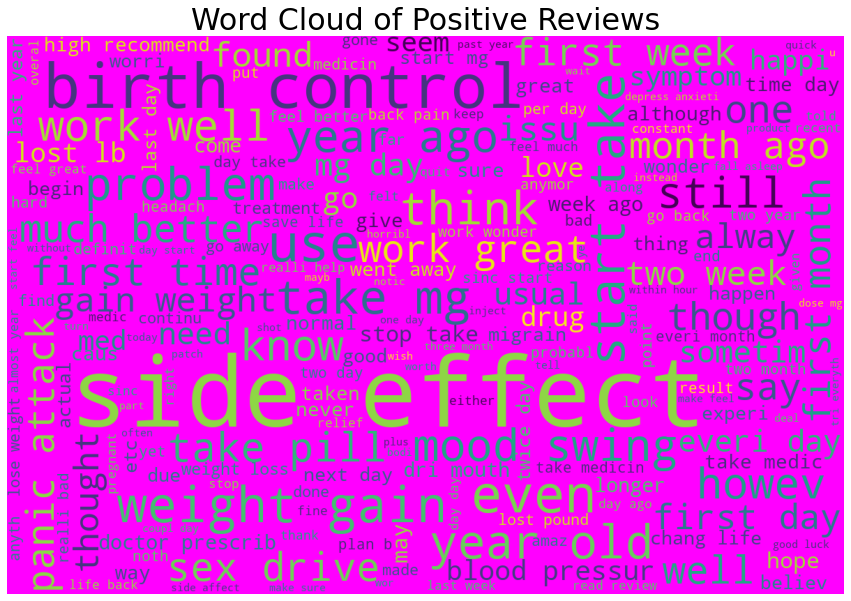

In [80]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in df['review_clean'][df['Rating_Label'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Visualise Negative Sentiment

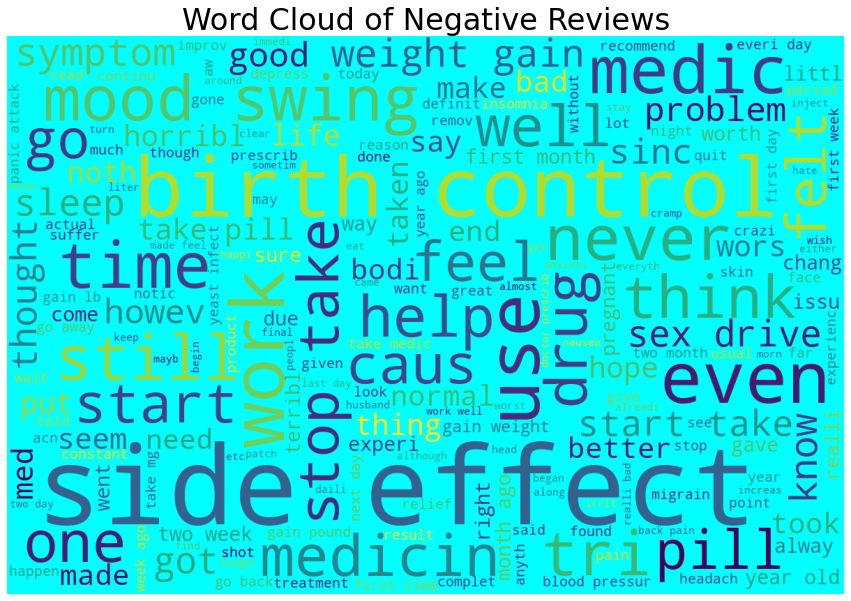

In [81]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in df['review_clean'][df['Rating_Label'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Most popular drugs

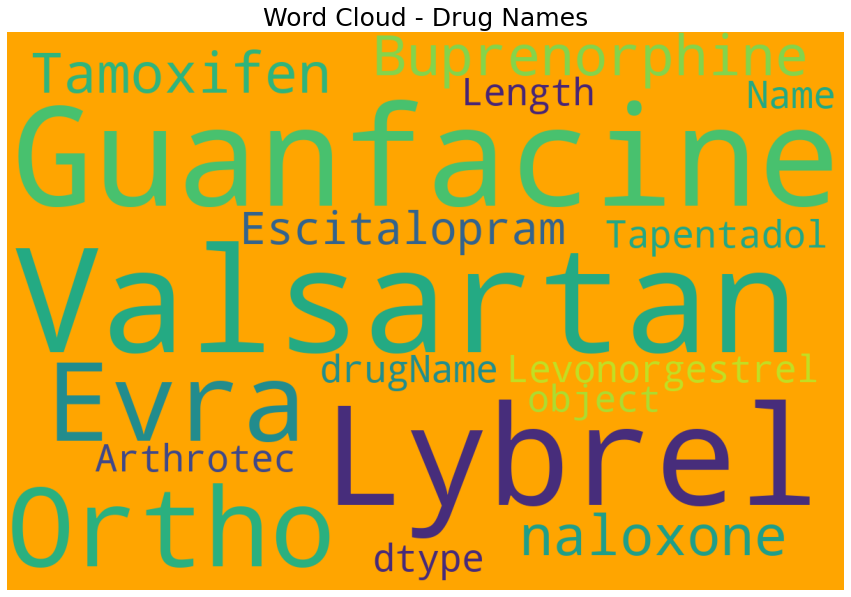

In [82]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(df['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Examine positive and negative patient's rating

In [83]:
positive = df[df["rating"]>=5]
negative = df[df["rating"]<5]

# Function to generate N-GRAM from corpus

In [84]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Visualize ngram of tokens from corpus

In [85]:
## Get the bar for negative rating ##
# Visualise ngram of token from corpus
freq_dict = defaultdict(int)
for sent in negative["review_clean"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart for positive ##
freq_dict = defaultdict(int)
for sent in positive["review_clean"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = make_subplots(rows=1, cols=2, vertical_spacing=0.5,
                          subplot_titles=["Frequent words of rating 1 to 4", 
                                          "Frequent words of rating 5 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1500, width=800, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots",font_size=22)
fig.show(filename='word-plots')

# Visualize Bigram of tokens

In [86]:
freq_dict = defaultdict(int)
for sent in negative["review_clean"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

freq_dict = defaultdict(int)
for sent in positive["review_clean"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = make_subplots(rows=1, cols=2, vertical_spacing=0.2,horizontal_spacing=0.5,
                          subplot_titles=["Frequent biagrams of rating 1 to 4", 
                                          "Frequent biagrams of rating 5 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1500, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots",font_size=22)
fig.show(filename='word-plots')

# Visualise Trigram tokens from corpus

In [87]:
freq_dict = defaultdict(int)
for sent in negative["review_clean"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

freq_dict = defaultdict(int)
for sent in positive["review_clean"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = make_subplots(rows=1, cols=2, vertical_spacing=0.2,horizontal_spacing=0.5,
                          subplot_titles=["Frequent trigrams of rating 1 to 4", 
                                          "Frequent trigrams of rating 5 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1500, width=900, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots",font_size=22)
fig.show(filename='word-plots')

# Visualise 4-grams tokens from sentiment corpus

In [88]:
freq_dict = defaultdict(int)
for sent in negative["review_clean"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

freq_dict = defaultdict(int)
for sent in positive["review_clean"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'red')

# Creating two subplots
fig = make_subplots(rows=1, cols=2, vertical_spacing=0,horizontal_spacing=0.5,
                          subplot_titles=["Frequent 4-grams of rating 1 to 4", 
                                          "Frequent 4-grams of rating 5 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1500, width=950, paper_bgcolor='rgb(233,233,233)', title="4-grams Count Plots",font_size=22)
fig.show(filename='word-plots')

# Determine correlation among integer features

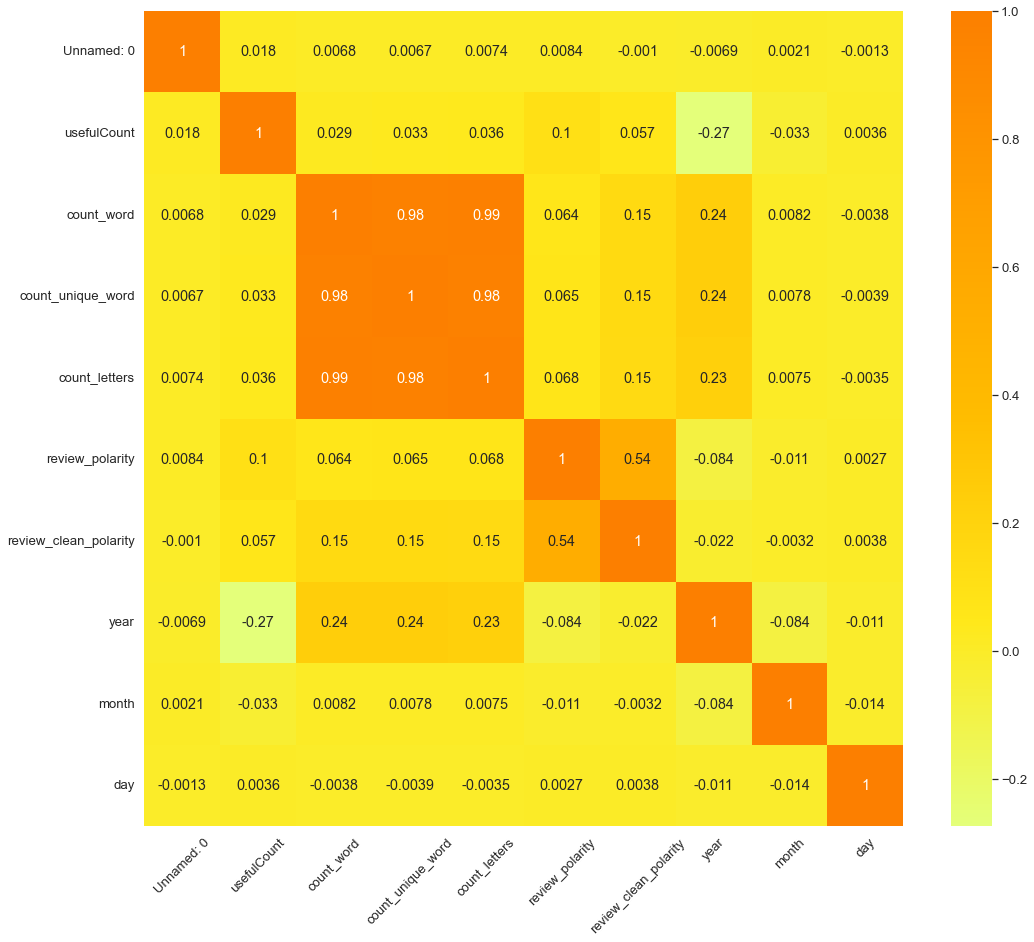

In [89]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

# Examine 20 Medical Conditions

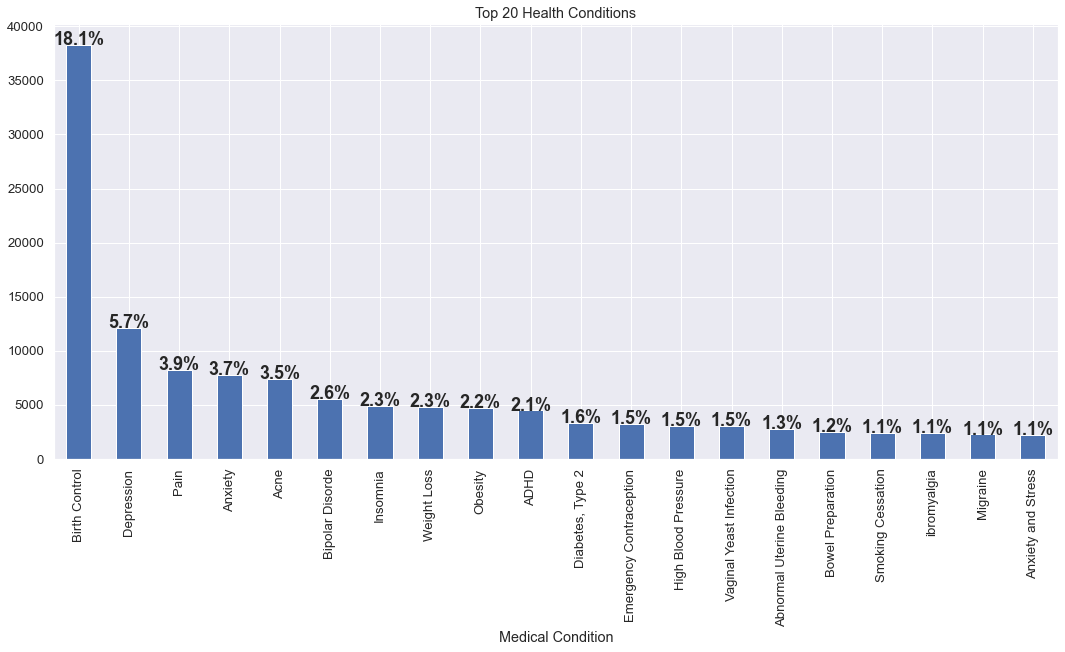

In [90]:
plt.figure(figsize=(18,8))
health_condition = df['condition'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Medical Condition')
plt.title('Top 20 Health Conditions')
for x in health_condition.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(outcome))*100)+'%',ha='center',weight='bold',size='18')
plt.show()
plt.show()

# Examine Unique Health Conditions

In [91]:
df.condition.unique().tolist()

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Opiate Dependence',
 'Benign Prostatic Hyperplasia',
 'Emergency Contraception',
 'Bipolar Disorde',
 'Epilepsy',
 'Migraine Prevention',
 'Depression',
 "Crohn's Disease",
 'Cough',
 'Obesity',
 'Urinary Tract Infection',
 'ibromyalgia',
 'Chronic Myelogenous Leukemia',
 'HIV Infection',
 'Insomnia',
 'Rheumatoid Arthritis',
 'Vaginal Yeast Infection',
 'Chlamydia Infection',
 'Hirsutism',
 'Panic Disorde',
 'Migraine',
 'Pain',
 'Irritable Bowel Syndrome',
 'Osteoarthritis',
 'Constipation',
 'Bowel Preparation',
 'Psychosis',
 'Muscle Spasm',
 'Hepatitis C',
 'Overactive Bladde',
 'Diabetes, Type 2',
 'Asthma, Maintenance',
 'Non-Small Cell Lung Cance',
 'Schizophrenia',
 'Dysuria',
 'Smoking Cessation',
 'Anxiety',
 'Acne',
 'emale Infertility',
 'Constipation, Acute',
 'Constipation, Drug Induced',
 'Erectile Dysfunction',
 'Trigeminal Neuralgia',
 'Underactive Thyroid',
 'Chronic Pain',
 'Atrophic Vaginitis',
 'Skin an

# Determine the statistics of medical health conditions

In [92]:
print(f'The total health condition is: {df.condition.nunique()}')

The total health condition is: 835


# Collecting 20 samples of health conditions

In [93]:
df.condition.sample(20, replace=False).values

array(['Irritable Bowel Syndrome', 'Post Traumatic Stress Disorde',
       'Depression', 'Bipolar Disorde', 'Anxiety', 'High Blood Pressure',
       'Birth Control', 'Diabetes, Type 2', 'Bowel Preparation',
       'Bipolar Disorde', 'Bowel Preparation', 'Depression',
       'Chronic Spasticity', 'Atrophic Vaginitis',
       'Chronic Idiopathic Constipation', 'Birth Control', 'Depression',
       'Atopic Dermatitis', 'Insomnia', 'Atrial Fibrillation'],
      dtype=object)

# Data Analysis

# Determine the total number of drugs

In [94]:
df['drugName'].nunique()

3645

# Visualize the most used drugs

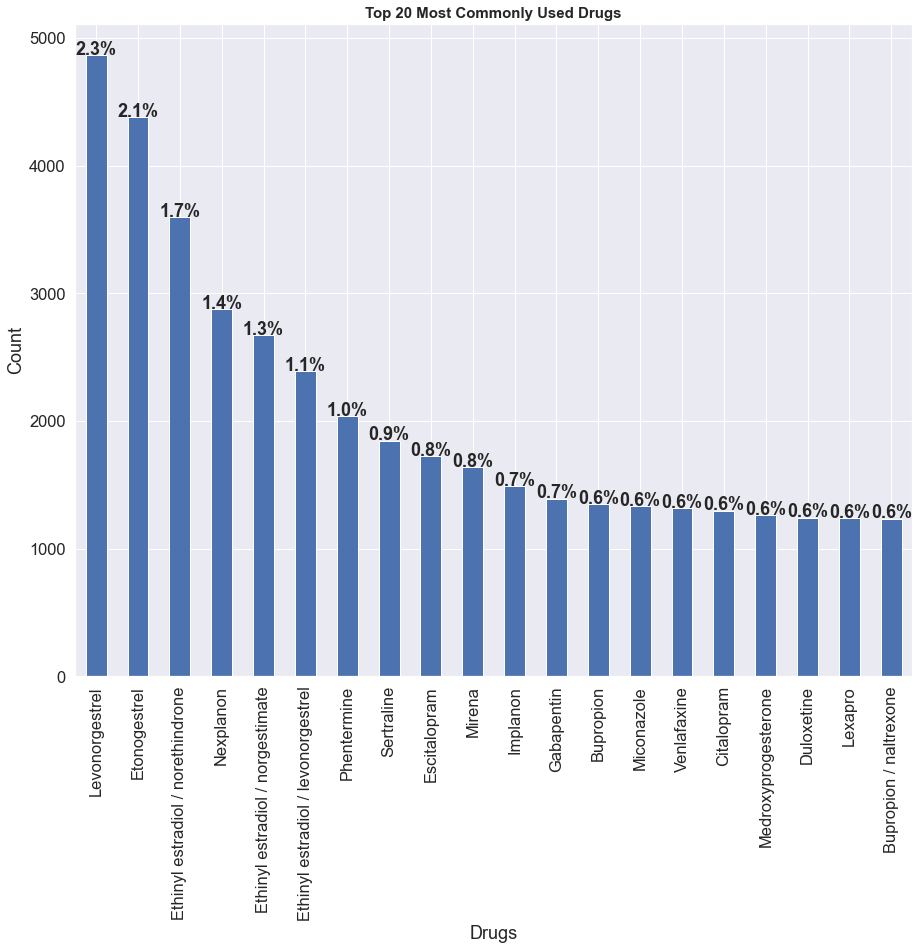

In [95]:
sns.set(font_scale = 1.5, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 12]
drug_list = df['drugName'].value_counts().sort_values().nlargest(20).plot(kind='bar')
plt.xlabel('Drugs')
plt.ylabel('Count')
plt.title('Top 20 Most Commonly Used Drugs', fontsize=15,weight='bold')
for x in drug_list.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')

plt.show()

In [96]:
# The most commonnest used drugs are hormonal drugs taken for birth control, depression and pains
# These commonly used drugs from the visualization above have the potential of being abused and the tendency of patients reacting adversely to them.

# Visualise the least  used drugs

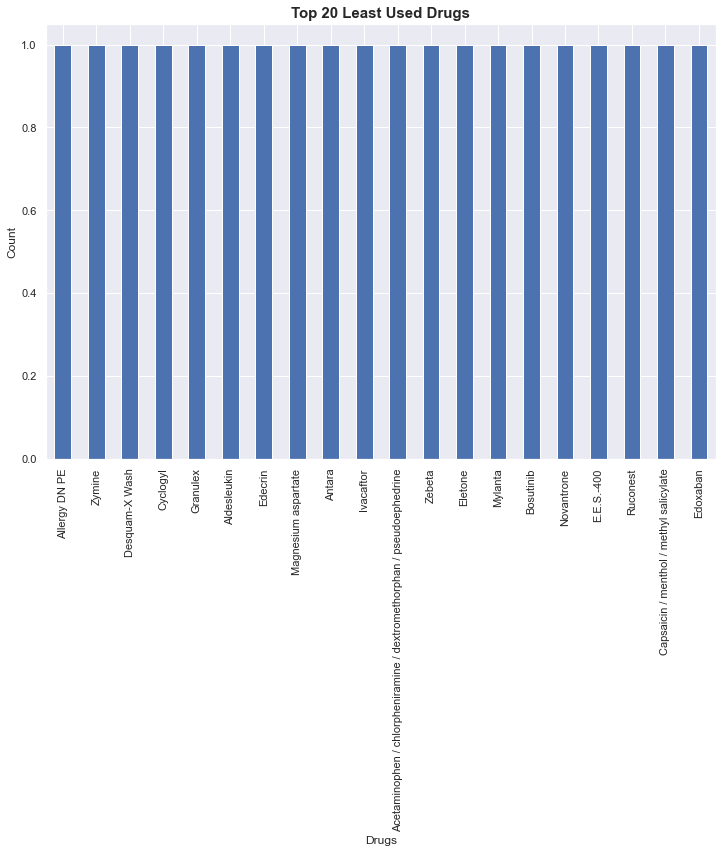

In [97]:
sns.set(font_scale = 1.0, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 8]
df['drugName'].value_counts().sort_values().nsmallest(20).plot(kind='bar')
plt.xlabel('Drugs')
plt.ylabel('Count')
plt.title('Top 20 Least Used Drugs', fontsize=15,weight='bold')
plt.show()

# Drugs with the highest rating

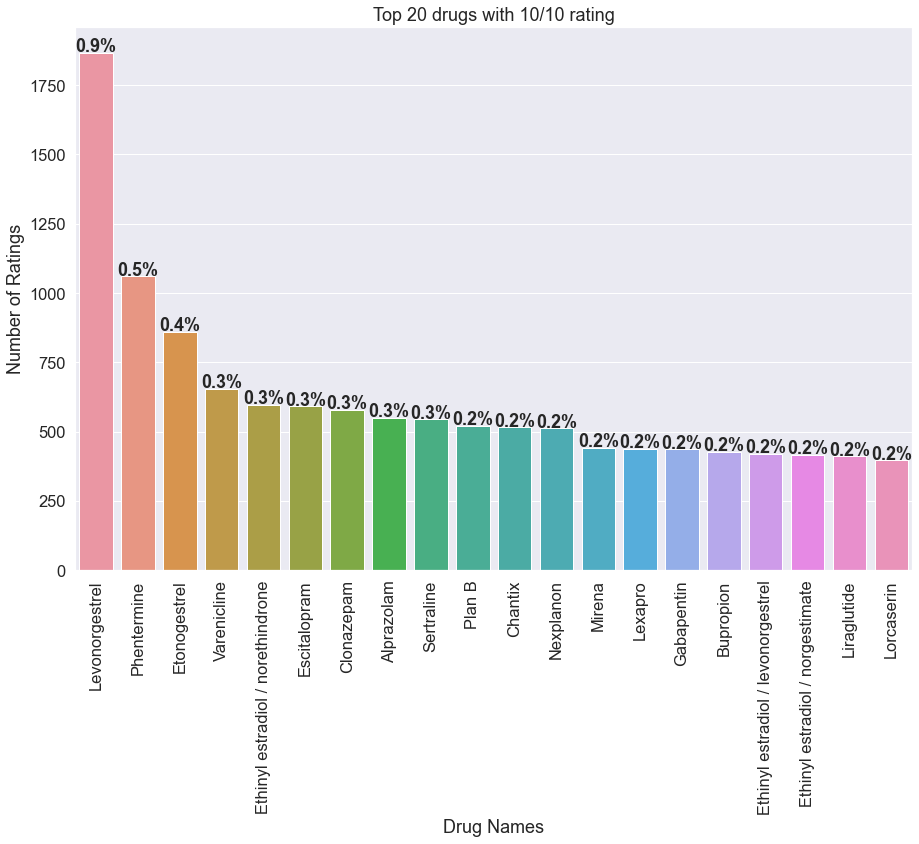

In [98]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.5, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 10]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);
for x in sns_rating.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

In [99]:
# Levonorgestrel, Phentemine, Etongestrel, Varenicline, Ethinyl estradol/norethindrone are samples of drugs with high
# tendency of adverse drug reaction

# Drugs with the lowest rating

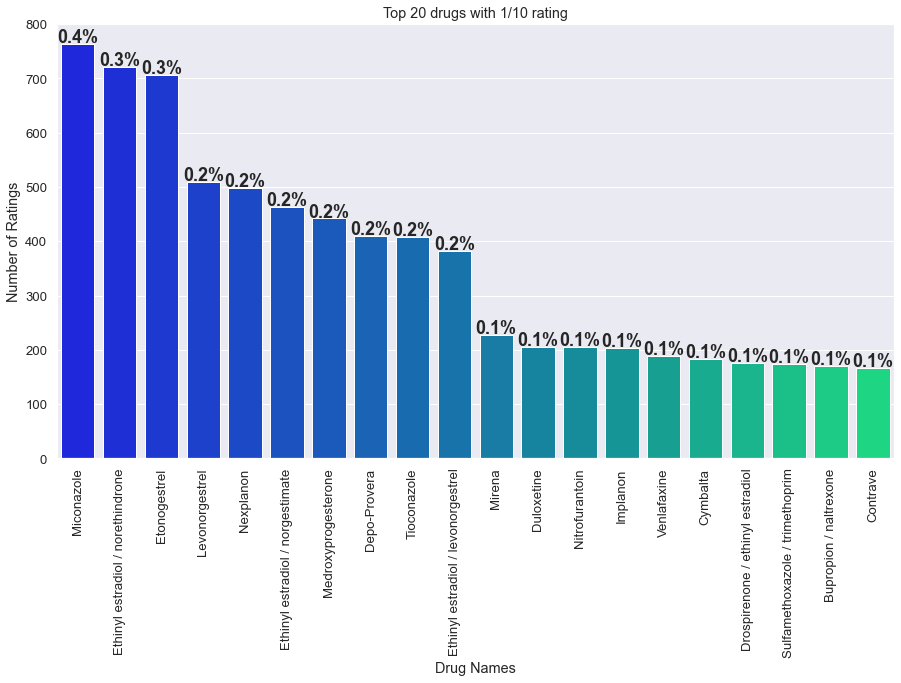

In [100]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
for x in sns_rating.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

In [101]:
# Drugs such as Mirena, Duloxetine, Nitrofuration, Implanon, Cymatta, Drospirenone, Suffamethoxazole, Bupropion and Contrave have consitute low
# signgnificant level to adverse drug reaction.

# Drug Categorization

In [102]:
# According to "https://druginfo.nlm.nih.gov/drugportal/jsp/drugportal/DrugNameGenericStems.jsp" drug formulary

In [103]:
# Building Library For Drug Categorization
drug_category = {
    "abine": "arabine, -citabine",
    "ac":  "Anti-inflammatory agents (acetic acid derivatives)",
    "acetam":  "racetam",
    "actide": "Synthetic corticotropins",
    "adol": "Analgesics (mixed opiate receptor agonists/ antagonists)",
    "aldol": "Analgesics (mixed opiate receptor agonists/ antagonists)",
    "adox": "Antibacterials",
    "afenone": "Antiarrhythmics",
    "afil": "PDE5 inhibitors",
    "aj": "Antiarrhythmics",
    "aj-": "Antiarrhythmics",
    "aldrate": "Antacid aluminum salts",
    "algron": "Alpha1 - and alpha2 - adrenoreceptor agonists",
    "alol": "Combined alpha and beta blockers",
    "amivir": "see -vir",
    "ampa": "Ionotropic non-NMDA glutamate receptors (AMPA and/or KA receptors)",
    "ampanel": "Ionotropic non-NMDA glutamate receptors (AMPA and/or KA receptors); antagonists",
    "ampator": "Ionotropic non-NMDA glutamate receptors (AMPA and/or KA receptors); modulators",
    "andr": "Androgens",
    "andr-": "Androgens",
    "anib": "Angiogenesis inhibitors",
    "anserin": "Serotonin 5-HT2 receptor antagonists",
    "antel": "Anthelmintics",
    "antrone": "Antineoplastics; anthraquinone derivatives",
    "apsel": "P-selectin antagonists",
    "arabine": "Antineoplastics (arabinofuranosyl derivatives)",
    "aril": "Antiviral (arildone derivatives)",
    "arit": "Antirheumatics (lobenzarit type)",
    "arol": "Anticoagulants (dicumarol type)",
    "arone": "Antiarrhythmics",
    "arot": "Arotinoids",
    "arot-": "Arotinoids",
    "arotene": "Arotinoid derivatives",
    "arte-": "Antimalarials (artemisin derivatives)",
    "ase": "Enzymes",
    "dismase": "Enzymes; superoxide dismutase activity (exception: orgotein)",
    "teplase": "Enzymes; tissue-type plasminogen activators",
    "uplase": "Enzymes; urokinase-type plasminogen activators",
    "ast": "Antiasthmatics/antiallergics (not acting primarily as antihistamines; leukotriene biosynthesis inhibitors)",
    "lukast": "	Antiasthmatics/antiallergics; leukotriene receptor antagonists",
    "milast": "Antiasthmatics/antiallergics; type IV phosphodiesterase inhibitors",
    "trodast": "Antiasthmatics/antiallergics; thromboxane A2 receptor antagonists",
    "zolast": "Antiasthmatics/antiallergics; benzoxazole derivatives",
    "tegr": "Antiasthmatics/antiallergics; integrin antagonists",
    "tegr-": "Antiasthmatics/antiallergics; integrin antagonists",
    "astine": "Antihistaminics (histamine-H1 receptor antagonists)",
    "(a)tadine": "Tricyclic histaminic-H1 receptor antagonists, loratadine derivatives",
    "atadine": "Tricyclic antiasthmatics",
    "axine": "Antianxiety, antidepressant inhibitor of norepinephrine and dopamine re-uptake",
    "(f)axine": "radafaxine",
    "azenil": "Benzodiazepine receptor agonists/antagonists",
    "azepam": "Antianxiety agents (diazepam type)",
    "azepide": "Cholecystokinin receptor antagonists",
    "azocine": "Narcotic antagonists/agonists (6,7-benzomorphan derivatives)",
    "azoline": "Antihistamines/local vasoconstrictors (antazoline type)",
    "azosin": "Antihypertensives (prazosin type)",
    "bactam": "Beta-lactamase inhibitors",
    "bamate": "Tranquilizers/antiepileptics (propanediol and pentanediol groups)",
    "barb": "Barbituric acid derivatives",
    "barb-": "Barbituric acid derivatives",
    "begron": "Beta 3 adrenoreceptor agonist",
    "bendazole": "Anthelmintics (tibendazole type)",
    "berel": "Beta estrogen receptor agonist",
    "bersat": "Anticonvulsants; antimigraine (benzoylamino-benzpyran derivatives)",
    "bol": "Anabolic steroids",
    "bol-": "Anabolic steroids",
    "bufen": "Non-steroidal anti-inflammatory agents, fenbufen derivatives",
    "bulin": "Antineoplastics (mitotic inhibitors; tubulin binders)",
    "butan": "Antiseptics (dapabutan type)",
    "butazone": "Anti-inflammatory analgesics (phenylbutazone type)",
    "caine": "Local anesthetics",
    "calci-": "Vitamin D analogues",
    "-calci-": "Vitamin D analogues",
    "camra": "Antivirals (intracellular adhesion molecules, icam-1 derivatives)",
    "camsule": "Camphorsulfonic acid derivatives used as UVA sunscreens",
    "casan": "Caspase (interleukin -1b) converting enzyme inhibitors",
    "caserin": "Serotonin receptor agonists, primarily 5-HT2",
    "castat": "see -stat",
    "carbef": "Antibiotics (carbacephem derivatives)",
    "catib": "Cathespin inhibitors",
    "cavir": "see -vir",
    "cef": "Cephalosporins",
    "cef-": "Cephalosporins",
    "cept": "Receptor molecules, native or modified ( a preceding infix should designate the target)",
    "co-": "Receptor molecules, native or modified;complement receptors",
    "facept": "Receptor molecules, native or modified;lymphocyte function-associated with antigen 3 (LFA) receptor",
    "farcept": "Receptor molecules, native or modified; interferon receptors",
    "lefacept": "Receptor molecules, native or modified; lymphocyte function-associated antigen 3",
    "nercept": "Receptor molecules, native or modified; tumor necrosis factor receptors",
    "vircept": "Receptor molecules, native or modified; antiviral receptors",
    "cet": "Receptors (small molecule)",
    "calcet": "Receptors (small molecule); calcium",
    "cetrapib": "Cholesterol ester transfer protein inhibitors",
    "cic": "Hepatoprotectives (timonacic type)",
    "ciclib": "Cyclin dependent kinase inhibitors",
    "ciclovir": "see -vir",
    "cidib": "Cyclin dependent kinase inhibitor",
    "cidin": "Natural antibiotics (undefined group)",
    "ciguat": "Guanaline cyclase activator",
    "cillin": "Penicillins",
    "citabine": "Nucleoside antiviral or antineoplastic agents, cytarabine or azarabine derivatives",
    "clidine": "Muscarinic agonists (various indications)",
    "clone": "Hypnotics/tranquilizers (zopiclone type)",
    "cog": "Blood coagulation factors",
    "eptacog": "Blood coagulation factors; blood coagulation factor VII",
    "nonacog": "Blood coagulation factors; blood coagulation factor IX",
    "octocog": "Blood coagulation factors; blood coagulation factor VIII",
    "cogin": "Blood coagulation cascade inhibitor",
    "conazole": "Systemic antifungals (miconazole type)",
    "cort-": "Cortisone derivatives",
    "coxib": "Cyclooxygenase-2 inhibitors",
    "cridar": "see dar",
    "crinat": "Diuretics (ethacrynic acid derivatives)",
    "crine": "Acridine derivatives",
    "cromil": "Antiallergics (cromoglicic acid derivatives)",
    "curium": "Neuromuscular blocking agents (quaternary ammonium compounds",
    "curonium": "Neuromuscular blocking agents (quaternary ammonium compounds",
    "cycline": "Antibiotics (tetracycline derivatives)",
    "dan": "Positive inotropic agents (pimobendan type)",
    "dapsone": "Antimycobacterials (diaminodiphenylsulfone derivatives)",
    "dar": "Multidrug resistance inhibitors",
    "cridar": "Multidrug resistance inhibitors;acridine carboxamide derivatives",
    "icodar": "Multidrug resistance inhibitors;pipecolic acid derivatives",
    "quidar": "Multidrug resistance inhibitors; quinoline derivatives",
    "spodar": "Multidrug resistance inhibitors; ciclosporin D derivatives",
    "denoson": "Adenosine A receptor agonists",
    "dermin": "see -ermin",
    "dil-": "Vasodilators",
    "-dil-": "Vasodilators",
    "-dil": "Vasodilators",
    "dipine": "Phenylpyridine vasodilators (nifedipine type)",
    "dismase": "see -ase",
    "distim": "see -stim",
    "ditan": "Antimigraine (5-HT1 receptor agonists)",
    "dopa": "Dopamine receptor agonists",
    "dore": "Dopamine D2D3 receptor modulators",
    "dotin": "Synthetic analogs of the dolastatin series",
    "dralazine": "Antihypertensives (hydrazine-phthalazines)",
    "dronate": "Calcium metabolism regulators",
    "dutant": "see -tant",
    "ectedin": "Ecteinascodin derivatives",
    "ectin": "Antiparasitics (ivermectin type)",
    "elestat": "see -stat",
    "elvakin": "see -kin",
    "emcinal": "Erythromycin derivatives lacking antibiotic activity",
    "entan": "Endothelin receptor antagonists",
    "eptacog": "see -cog",
    "eptakin": "see -kin",
    "erg-": "Ergot alkaloid derivatives",
    "eridine": "Analgesics (meperidine type)",
    "ermin": "Growth factors",
    "bermin": "Growth factors; vascular endothelial growth factors",
    "dermin": "Growth factors; epidermal growth factors",
    "fermin": "Growth factors; fibroblast growth factors",
    "nermin": "Growth factors; tumor necrosis factors",
    "plermin": "Growth factors; platelet derived growth factors",
    "sermin": "Growth factors; insulin-like growth factors",
    "termin": "Growth factors; transforming growth factors",
    "otermin": "Growth factors; bone morphogenetic proteins",
    "estr-": "Estrogens",
    "estrant": "Estrogen antagonists",
    "etanide": "Diuretics (piretanide type)",
    "exakin": "see -kin",
    "ezolid": "Oxazolidinone antibacterials",
    "farnib": "Farnesyl transferase inhibitor",
    "fenamate": "fenamic acid, ester, salt derivatives",
    "fenamic acid": "Anti-inflammatory agents (anthranilic acid derivatives)",
    "fenin": "Diagnostic aids ((phenylcarbamoyl)methyl iminodiacetic acid derivatives)",
    "fenine": "Analgesics (fenamic acid subgroup)",
    "fentanil": "Narcotic analgesics (fentanyl derivatives)",
    "fentrine": "Phosphodiesterase inhibitor",
    "fermin": "see -ermin",
    "fetamin(e)": "Amfetamine derivatives",
    "fiban": "Fibrinogen receptor antagonists (glycoprotein IIb/IIIa receptor antagonists)",
    "fibatide": "see -tide",
    "fibrate": "Antihyperlipidemics (clofibrate type)",
    "filcon": "Hydrophilic contact lens materials",
    "fingol": "Sphingosine derivatives",
    "flapon": "5-lipoxygenase-activating protein (FLAP) inhibitors",
    "flurane": "General inhalation anesthetics (halogenated alkane derivatives)",
    "fo-": "Phosphoro-derivatives",
    "focon": "Hydrophobic contact lens materials",
    "formin": "Hypoglycemics (phenformin type)",
    "fradil": "Calcium channel blockers acting as vasodilators",
    "fulven": "Antineoplastic, acylfulven derivatives",
    "fungin": "Antifungal antibiotics",
    "fylline": "Theophylline derivatives",
    "gab-": "Gabamimetics",
    "gado-": "Gadolinium derivatives (principally for diagnostic use)",
    "gapil": "Neuronal apoptosis inhibitors; GAPDH",
    "ganan": "Antimicrobial, bactericidal permeability increasing polypeptide",
    "gatran": "Thrombin inhibitors (argatroban type)",
    "gest-": "Progestins",
    "giline": "MAO inhibitors, type B",
    "gillin": "Antibiotics (Aspergillus strains)",
    "gli-": "Antihyperglycemics",
    "gliptin": "Antihyperglycemics; dipeptidyl aminopeptidase-IV inhibitors",
    "glitazar": "Antihyperglycemics; PPAR agonists (not thiazolidene derivatives)",
    "glitazone": "Antihyperglycemics; PPST agonists (thiazolidene derivatives)",
    "glumide": "CCK antagonists, antiulcer, anxiolytic agent",
    "golix": "GnRH receptor antagonists (nonpeptide)",
    "gosivir": "see -vir",
    "gramostim": "see -stim",
    "grastim": "see -stim",
    "grel-": "Platelet aggregation inhibitors",
    "-grel": "Platelet aggregation inhibitors",
    "guan-": "Antihypertensives (guanidine derivatives)",
    "ibat": "Ileal bile acid transport inhibitor",
    "icam": "Anti-inflammatory agents (isoxicam type)",
    "icodar": "see -dar",
    "ifen(e)": "Antiestrogens of the clomifene and tamoxifen groups",
    "ilide": "Class III antiarrhythmic agents",
    "imepodib": "Inosine monophosphate dehydrogenase inhibitors",
    "imex": "Immunostimulants",
    "imibe-": "	Antihyperlipidaemics, acyl CoA: cholesterol acyltransferase (ACAT) inhibitors",
    "imod": "Immunomodulators",
    "mapimod": "Immunomodulators; mitogen-activated protein (MAP) kinase inhibitors",
    "imus": "Immunosuppressives",
    "io-": "Iodine-containing contrast media",
    "irudin": "Anticoagulants (hirudin type)",
    "isant": "Histamine H3 receptor antagonists",
    "isomide": "Antiarrhythmics (disopyramide derivatives)",
    "ium": "Quaternary ammonium derivatives",
    "onium": "Quaternary ammonium derivatives",
    "ixafor": "CXCR4 antagonists",
    "kacin": "Antibiotics obtained from Streptomyces kanamyceticus (related to kanamycin)",
    "kalant": "Potassium channel antagonists",
    "kalim": "Potassium channel agonists",
    "kalner": "Opener of large conductance calcium-activated (maxi-k) K+ channels",
    "kef-": "Enkephalin agonists (various indications)",
    "kin": "Interleukin type substances",
    "decakin": "Interleukin type substances; interleukin-10 analogues and derivatives",
    "dodekin": "Interleukin type substances; interleukin-12 analogues and derivatives",
    "elvekin": "Interleukin type substances; interleukin 11 analogues and derivatives",
    "eptakin": "Interleukin type substances; interleukin 7 analogues and derivatives",
    "exakin": "Interleukin type substances; interleukin 6 analogues and derivatives",
    "leukin": "Interleukin type substances; interleukin 2 analogues and derivatives",
    "nakin": "Interleukin 1 analogues and derivatives",
    "onakin": "Interleukin 1 analogues and derivatives; interleukin 1-a analogues and derivatives",
    "benakin": "Interleukin 1 analogues and derivatives; iinterleukin 1-b analogues and derivatives",
    "nonakin": "Interleukin 1 analogues and derivatives; iinterleukin 9 analogues and derivatives",
    "octakin": "Interleukin 1 analogues and derivatives; iinterleukin 8 analogues and derivatives",
    "penkin": "Interleukin 1 analogues and derivatives; iinterleukin 5 analogues and derivatives",
    "trakin": "Interleukin 1 analogues and derivatives; iinterleukin 4 analogues and derivatives",
    "kinra": "Interleukin receptor antagonists",
    "nakinra": "Interleukin receptor antagonists; interleukin 1 (IL-1) receptor antagonists",
    "kiren": "Renin inhibitors",
    "lazad": "Lipid peroxidation inhibitors",
    "leptin": "Leptin derivatives",
    "leukin": "see -kin",
    "lind": "Pro-apoptotic cGMP phosphodiesterase inhibitors",
    "sulind": "Pro-apoptotic cGMP phosphodiesterase inhibitors; antineoplastics, sulindac metabolites",
    "lipim": "Lipoprotein lipase activators",
    "locib": "Antineoplastics that inhibit the formation of 5-LO, LTB4, LTC4, and thromboxane B2 (TxB2); and Activate PPARg nuclear receptors",
    "lubant": "Leukotriene receptor antagonists",
    "lukast": "see -ast",
    "lutamide": "Antiandrogens",
    "lutril": "Neutral endopeptidase inhibitors possessing additional endothelin converting enzyme inhibitory activity",
    "mab": "Monoclonal antibodies",
    "axo-": "Monoclonal antibodies; rat-murine hybrid antibodies",
    "les-": "Monoclonal antibodies; infix for inflammatory/infectious lesions",
    "toxa-": "Monoclonal antibodies; toxin as a target",
    "mantadine": "Antivirals/antiparkinsonians (adamantane derivatives)",
    "mantine": "Antivirals/antiparkinsonians (adamantane derivatives)",
    "mastat": "see - stat",
    "meline": "Cholinergic agonists (arecoline derivatives used in treatment of Alzheimer's disease)",
    "melteon": "Selective melatonin receptor agonist",
    "mer": "Polymers",
    "mesine": "Sigma receptor ligands",
    "mestane": "Antineoplastics (aromatase inhibitors)",
    "metacin": "Anti-inflammatory agents (indomethacin type)",
    "micin": "Antibiotics (Micromonospora strains)",
    "monam": "Monobactam antibiotics",
    "morelin": "see -relin",
    "moren": "Non-peptidic growth hormone secretagogues",
    "mostim": "see -stim",
    "motine": "Antivirals (quinoline derivatives)",
    "moxin": "Monoamine oxidase inhibitors (hydrazine derivatives)",
    "mulin": "Antibacterials, pleuromulin derivatives",
    "multin": "Mucosal tolerance inductors",
    "mustine": "Antineoplastics (chloroethylamine derivatives)",
    "mycin": "Antibiotics (Streptomyces strains)",
    "nab-": "Cannabinol derivatives",
    "-nab-": "Cannabinol derivatives",
    "nakalant": "Mixed sodium/potassium channel blockers",
    "nakin": "see kin",
    "nal-": "Narcotic agonists/antagonists (normorphine type)",
    "navir": "see -vir",
    "nercept": "see -cept",
    "nermin": "see -ermin",
    "nertant": "Neurotensin receptor antagonists",
    "nesib": "Kinesin inhibitors",
    "netant": "see -tant",
    "neurin": "Neurotensin receptor antagonists; neurotropins",
    "nicline": "Nicotinic acetylcholine receptor partial agonists/agonists nonsteroidal anti-inflammatory agents",
    "nidap": "Nonsteroidal anti-inflammatory agents (tenidap type)",
    "nidazole": "Antiprotozoal substances (metronidazole type)",
    "nifur-": "5-nitrofuran derivatives",
    "nil": "Benzodiazepine receptor antagonists/agonists",
    "punil": "Mitochondrial benzodiazepine receptor (MBR) selective, partial, or inverse agonists (purine derivatives)",
    "quinil": "Benzodiazepine receptor agonists, also partial or inverse (quinoline derivatives)",
    "nixin": "Anti-inflammatory agents (anilinonicotinic acid derivatives)",
    "nonacog": "see -cog",
    "nonakin": "see -kin",
    "octacog": "see -cog",
    "octakin": "see -kin",
    "olol": "Beta-blockers (propranolol type)",
    "olone": "Steroids (not prednisolone derivatives)",
    "onide": "Topical steroids (acetal derivatives)",
    "opilone": "Epothilone",
    "orex": "Anorexiants",
    "orphan": "Narcotic antagonists/agonists dextro-(morphinan derivatives)",
    "osuran": "Urotensin receptor antagonists",
    "otilate": "Hepatoprotectants",
    "oxacin": "Antibacterials (quinolone derivatives)",
    "oxan": "Alpha-adrenoceptor antagonists (benzodioxane derivatives)",
    "oxanide": "Antiparasitics (salicylanilide derivatives)",
    "oxef": "Antibiotics (oxacefalosporanic acid derivatives)",
    "oxetine": "Antidepressants (fluoxetine type)",
    "pafant": "Platelet-activating factor antagonists",
    "pamide": "Diuretics",
    "pamil": "Coronary vasodilators",
    "pamine": "Dopaminergics",
    "panel": "AMPA receptor antagonists",
    "parcil": "Antithrombotics",
    "parcin": "Glycopeptide antibiotics",
    "parin": "Heparin derivatives and low molecular weight",
    "parinux": "Antithrombotyic indirect selective synthetic factor Xa inhibitors",
    "paroid": "Antithrombotics",
    "peg-": "PEGylated compounds",
    "penem": "Antibacterial antibiotics",
    "penkin": "see -kin",
    "perflu-": "Blood substitutes and/or diagnostics (perfluorochemicals)",
    "peridol": "Antipsychotics (haloperidol type)",
    "peridone": "Antipsychotics (risperidone type)",
    "perone": "Antianxiety agents/neuroleptics",
    "pezil": "Acetylcholinesterase inhibitors used in the treatment of Alzheimer’s disease",
    "pidem": "Hypnotics/sedatives (zolpidem type)",
    "pirdine": "Cognition enhancers",
    "pirox": "Antimycotics (pyridone derivatives)",
    "pitant": "see -tant",
    "plact": "Platelet factor 4 analogs and derivatives",
    "pladib": "Phospholipase A2 inhibitors",
    "planin": "Antibacterials (Actinoplanes strains)",
    "platin": "Antineoplastics (platinum derivatives)",
    "plasninin": "Inhibitors of plasminogen activator inhibitors - type 1",
    "plermin": "see -ermin",
    "plestim": "see -stim",
    "plon": "Non-benzodiazepine anxiolytics, sedatives, hypnotics",
    "poetin": "Erythropoietins",
    "porfin": "Benzoporphyrin derivatives",
    "pramine": "Antidepressants (imipramine type)",
    "prazan": "Acid pump inhibitors, not dependent on acid activation",
    "prazole": "Antiulcer agents (benzimidazole derivatives)",
    "maprazole": "Antiulcer agents (benzimidazole derivatives)",
    "pred-": "Prednisone and prednisolone derivatives",
    "-pred-": "Prednisone and prednisolone derivatives",
    "pressin": "Vasoconstrictors (vasopressin derivatives)",
    "pride": "Sulpiride derivatives",
    "pril": "Antihypertensives (ACE inhibitors)",
    "prilat":"Antihypertensives (ACE inhibitors) (diacid analogs of the -pril entity",
    "prinim": "Nootropic agents, purine derivatives",
    "prim": "Antibacterials (trimethoprim type)",
    "prisnil": "Selective progesterone receptor modulators (SPRM)",
    "pristin": "Antibacterials, pristinamycin derivatives",
    "pristone": "Progesterone receptor antagonists",
    "profen": "Anti-inflammatory/analgesic agents (ibuprofen type)",
    "-prost": "Prostaglandin derivatives",
    "protafib": "Protein tyrosine phosphatase 1B inhibitors",
    "pultide": "see -tide",
    "proget": "Nonsteroidal ligand for the progesterone receptor",
    "queside": "Cholesterol sequestrants (glycosides)",
    "racetam": "Nootropes (piracetam type)",
    "racil": "Uracil type antineoplastics",
    "relin": "Prehormones or hormone-release stimulating peptides",
    "morelin": "Growth hormone-release stimulating peptides",
    "tirelin": "Thyrotropin releasing hormone analogues",
    "relix": "Hormone-release inhibiting peptides aldosterone antagonists (spironolactone type)",
    "renone": "Aldosterone antagonists (spironolactone type)",
    "restat": "see -stat",
    "retin-": "Retinol derivatives",
    "-retin": "Retinol derivatives",
    "rev": "Therapeutic virus",
    "tucirev": "Therapeutic virus; tumoricidal",
    "ribine": "Ribofuranil derivatives (pyrazofurin type)",
    "rifa-": "Antibiotics (rifamycin derivatives)",
    "rinone": "Cardiotonics (amrinone type)",
    "rozole": "Aromatase inhibitors (imidazole/triazole derivatives)",
    "rsen": "Antisense oligonucleotides",
    "rubicin": "Antineoplastic antibiotics (daunorubicin type)",
    "sal-": "Anti-inflammatory agents (salicylic acid derivatives)",
    "-sal": "Anti-inflammatory agents (salicylic acid derivatives)",
    "-sal-": "Anti-inflammatory agents (salicylic acid derivatives)",
    "sartan": "Angiotensin II receptor antagonists",
    "semide": "Diuretics (furosemide type)",
    "sermin": "see -ermin",
    "serod": "Serotonin receptor antagonists and partial agonists",
    "serpine": "Rauwolfia alkaloid derivatives",
    "setron": "Serotonin 5-HT3 antagonists",
    "siban": "Oxytocin antagonists",
    "sidomine": "Antianginals (sydnone derivatives)",
    "som-": "Growth hormone derivatives",
    "som- -bove":"Growth hormone derivatives; bovine somatotropin derivatives",
    "som- -por": "Growth hormone derivatives; porcine somatotropin derivatives",
    "sonan": "5-HT1B receptor antagonists",
    "spirone": "Anxiolytics (buspirone type)",
    "spodar": "see -dar",
    "sporin": "Immunosuppressants (cyclosporine type)",
    "-stat-": "Enzyme inhibitors",
    "-stat": "Enzyme inhibitors",
    "castat": "Enzyme inhibitors; dopamine beta-hydrolase (DBH) inhibitors",
    "elestat": "Enzyme inhibitors; elastase inhibitors",
    "inostat": "Enzyme inhibitors; inhibitors of histone deacetylase",
    "mastat": "Enzyme inhibitors; antineoplastics (matrix metalloproteinase inhibitors)",
    "(a)mostat": "Enzyme inhibitors; proteolytic enzyme inhibitors",
    "-restat-": "Aldose-reductase inhibitors",
    "restat-": "Aldose-reductase inhibitors",
    "vastatin": "Antihyperlipidemics (HMG-CoA inhibitors)",
    "urestat": "Urease inhibitor",
    "-stat-": "Renal dehydropeptidase inhibitor",
    "stat-":"Pepsin inhibitor",
    "statin": "Renal dehydropeptidase inhibitor pepsin inhibitor",
    "ster-": "Steroids (androgens, anabolics)",
    "steride": "Testosterone reductase inhibitors",
    "stigmine": "Cholinesterase inhibitors (physostigmine type)",
    "stim": "Colony-stimulating factors",
    "distim": "Colony-stimulating factors; conjugates of two different types of colony-stimulating factors",
    "gramostim": "Colony-stimulating factors; granulocyte macrophage colony- stimulating factors (GM-CSF)",
    "grastim": "Colony-stimulating factors; granulocyte colony-stimulating factors (G-CSF)",
    "mostim": "Colony-stimulating factors; macrophage colony-stimulating factors (M-CSF)",
    "plestim":"Colony-stimulating factors; interleukin 3 derivatives; pleiotropic colony-stimulating factors",
    "stinel": "NMDA receptor antagonists (glycine recognition site)",
    "sulam": "Antineoplastics, apoptosis inducing sulfonamide",
    "sulfa-": "Antimicrobials (sulfonamides derivatives)",
    "sulfan": "Antineoplastics, alkylating agents (methanesulfonate derivatives)",
    "sulind": "see -lind",
    "tant": "Tachykinin (neurokinin) receptor antagonists",
    "dutant": "Tachykinin (neurokinin) receptor antagonists; NK2 receptor antagonists",
    "netant":"Tachykinin (neurokinin) receptor antagonists; NK3 receptor antagonists",
    "pitant": "Tachykinin (neurokinin) receptor antagonists; NK1 receptor antagonists",
    "tapide": "Microsomal triglyceride transfer protein (MTP) inhibitors",
    "taxel": "Antineoplastics, taxane derivatives",
    "tecan": "Antineoplastics (camptothecine derivatives)",
    "tecarin": "Antineoplastics (rebeccamycin derivatives)",
    "tepa": "Antineoplastics (thiotepa derivatives)",
    "teplase": "see -ase",
    "termin": "see -ermin",
    "terol": "Bronchodilators (phenethylamine derivatives)",
    "tesind": "	Thymidilate synthetase inhibitors (benzindole derivatives)",
    "texafin": "Texaphryn derivatives",
    "thiazide": "Diuretics (thiazide derivatives)",
    "tiapine": "Antipsychotics (dibenzothiazepine derivatives)",
    "tiazem": "Calcium channel blockers (diltiazem type)",
    "tibant": "Antiasthmatics (bradykinin antagonists)",
    "tide": "Peptides and glycopeptides",
    "fibatide": "Peptides and glycopeptides; platelet aggregation inhibitors",
    "pultide": "Peptides and glycopeptides; peptides used as pulmonary surfactants",
    "tidine": "H2-receptor antagonists (cimetidine type)",
    "tinib": "Tyrosine kinase inhibitors",
    "tirelin": "see -relin",
    "tirome": "Antihyperlidaemic, thyromimetic derivatives",
    "tocin": "Oxytocin derivatives",
    "toclax": "Antineoplastic, BCL-2 inhibitor",
    "toin": "Antiepileptics (hydantoin derivatives)",
    "toran": "TLR4 receptor antagonists",
    "tox(a)-": "Toxins",
    "traposin": "AP2 inhibitors",
    "trexate": "Antimetabolites (folic acid derivatives)",
    "trexed": "Antineoplastic thymidylate synthetase inhibitors",
    "tricin": "Antibiotics",
    "tril": "Endopeptidase inhibitors",
    "trilat": "Endopeptidase inhibitors",
    "triptan": "Antimigraine agents",
    "triptyline": "Antidepressants",
    "troban": "Antithrombotics",
    "trodast": "see -ast",
    "troline": "Antipsychotics",
    "trombopag": "Thrombopoetin agonists",
    "trop": "Atropine derivatives",
    "-trop-": "Atropine derivatives",
    "uclin": "Mucosal tolerance inhibitors",
    "uplase": "see -ase",
    "uracil": "Uracil derivatives used as thyroid antagonists and as antineoplastics",
    "uridine": "Antivirals; antineoplastics",
    "vaptan": "Vasopressin receptor antagonists",
    "vastatin": "see -stat",
    "verine": "Spasmolytic agents",
    "vin-": "Vinca alkaloids",
    "-vin-": "Vinca alkaloids",
    "vir-": "Antiviral substances",
    "-vir-": "Antiviral substances",
    "-vir": "Antiviral substances",
    "amivir": "Antiviral substances; neuraminidase inhibitors",
    "cavir": "Antiviral substances; carbocyclic nucleosides",
    "cyclovir": "Antiviral substances; (acyclovir type)",
    "ciclovir": "Antiviral substances; (acyclovir type)",
    "gosivir": "Antiviral substances; glucosidase inhibitor",
    "navir": "Antiviral substances; HIV protease inhibitors",
    "virdine": "Antiviral substances",
    "virenz": "Antivirals (non-nucleoside reverse transcriptase inhibitors; benzoxazinone derivatives)",
    "virsen": "Antivirals (antisense)",
    "vircept": "see -cept",
    "virdine": "see -vir",
    "virenz": "see -vir",
    "virimat": "Antiviral, disrupts viral maturation",
    "viroc": "CCR5 antagonists",
    "criviroc": "CCR5 antagonists, immunomodulators",
    "vudine": "Antineoplastics; antivirals",
    "xaban": "Anticoagulant (Factor Xa inhibitor)",
    "xanox": "Antiallergic respiratory tract drugs (xanoxic acid derivatives)",
    "(x)antrone": "Antineoplastics, mitoxantrone derivatives aza-anthracenedione class of antitumor agents",
    "zolamide": "Carbonic anhydrase inhibitors",
    "zolast": "see -ast",
    "zomib": "Proteozome inhibitors",
    "zotan": "5-HT1A receptor agonists/antagonists acting primarily as neuroprotectors"
}

In [104]:
# function to categorise drug
def categorise_drug(drug):
    for x in drug_category.keys():
        if drug.endswith(x):
            return drug_category[x]

In [105]:
# Creating a new feature for drug category

In [106]:
df['category'] = df['drugName'].apply(categorise_drug)

# Determine the statistics of drug category

In [107]:
print(f" The number of unique drug category examine is: {df['category'].value_counts().nunique()}")

 The number of unique drug category examine is: 111


# Visualize top 20 most commonest class of drugs

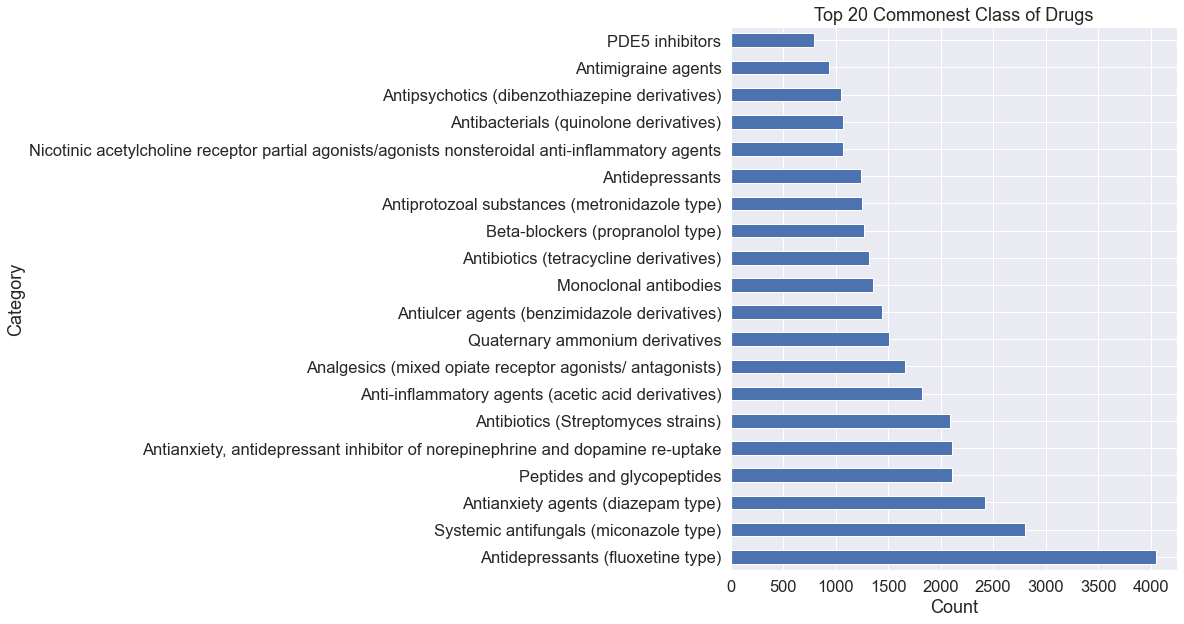

In [108]:
sns.set(font_scale = 1.5, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [8, 10]
df['category'].value_counts().nlargest(20).plot(kind='barh')
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('Top 20 Commonest Class of Drugs')
plt.show()

In [109]:
#  It can be inferred that Antidepressants, Systemic Antifungals,Antianxiety agents, Peptides and Glycopetides are
#  some of the top class of drugs that should be subjected to pharmacognitive reaction

# Least 20 Unpopularly Used Drug Class

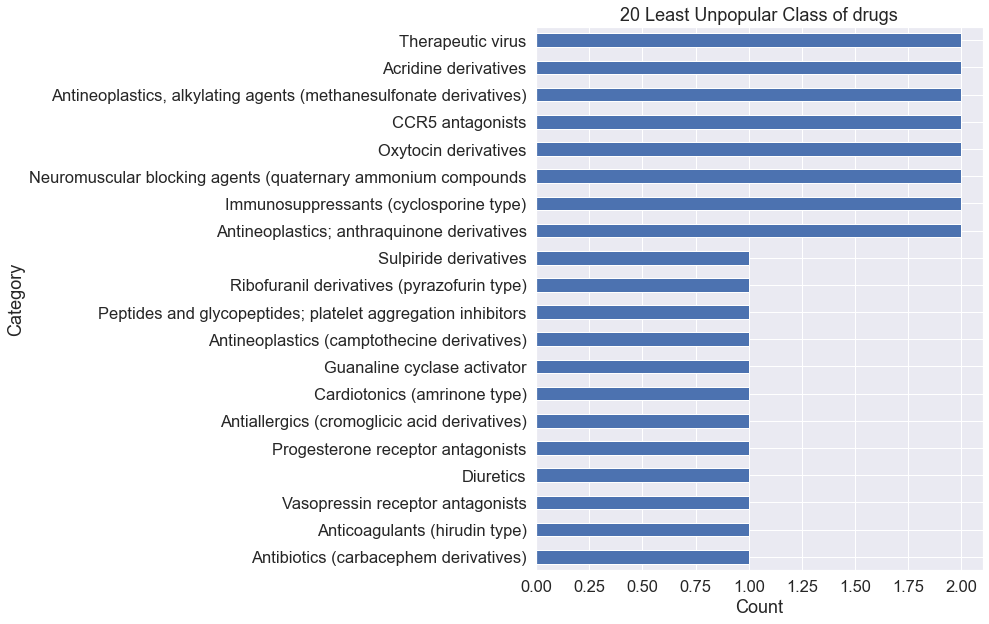

In [110]:
sns.set(font_scale = 1.5, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [8, 10]
df['category'].value_counts().nsmallest(20).plot(kind='barh')
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('20 Least Unpopular Class of drugs')
plt.show()

In [111]:
# Based on the visualization above, category of drugs such as Antibiotics(carbacephem derivatives),Anticoagulants(hirudin type),
# Vasoprressin receptor antagonists,Diuretics,Antiallergies(Cromoglicic acid derivatives) are some of the class of drugs that 
# should be stored in the pharmacy archive and not likely to cause any adverse reaction

# TOP 10 Health Conditions

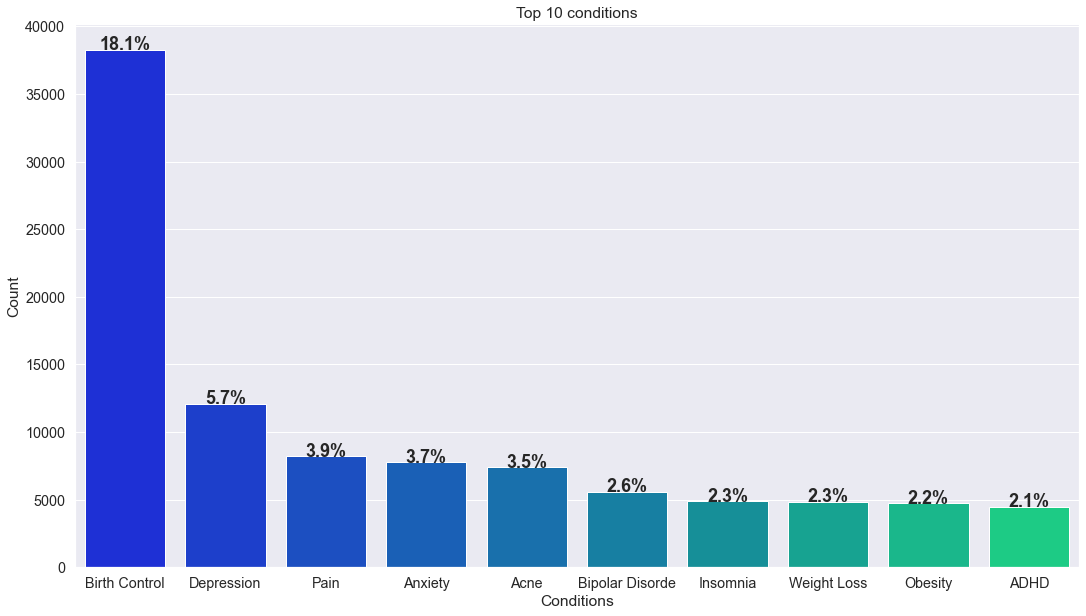

In [112]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(df['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 10]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count")
for x in sns_.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

In [113]:
# It is highly recommended that medical conditions such as birth control, depression, pain, anxiety, 
# acne and Bipolar Disorder are some of the conditions that are prone to constitute adverse drug reaction

# Least 10 Health Conditions

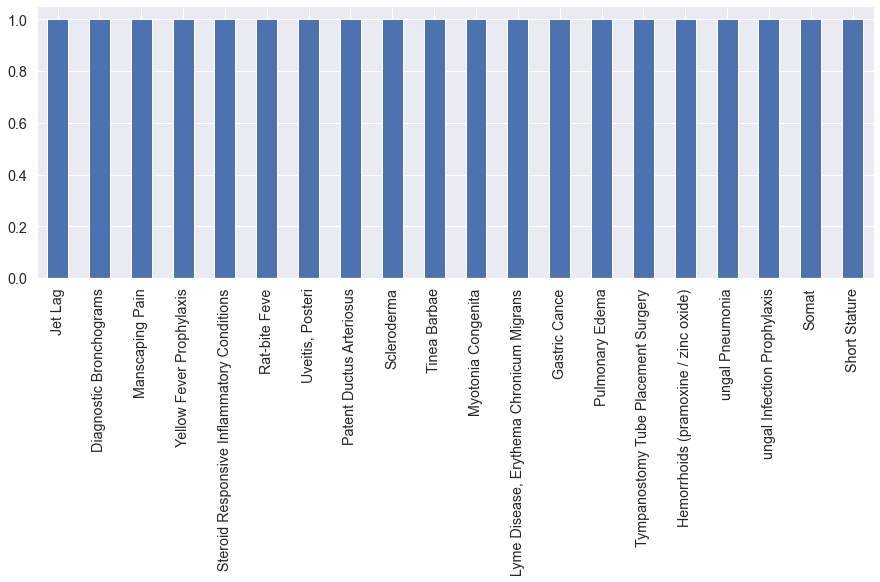

In [114]:
# This barplot show the top 10 conditions the people are suffering.
least_condition = df['condition'].value_counts().nsmallest(20).plot(kind='bar', figsize=(15,5))
plt.show()

In [115]:
# Medical conditions such as Jet Lag, Diagnostic Bronchograms, Manscaping Pain, 
# Yellow fever Prophylaxis etc are conditions not prone to adverse drug reaction

# Top 20 Commonly Used Drugs For Birth Control

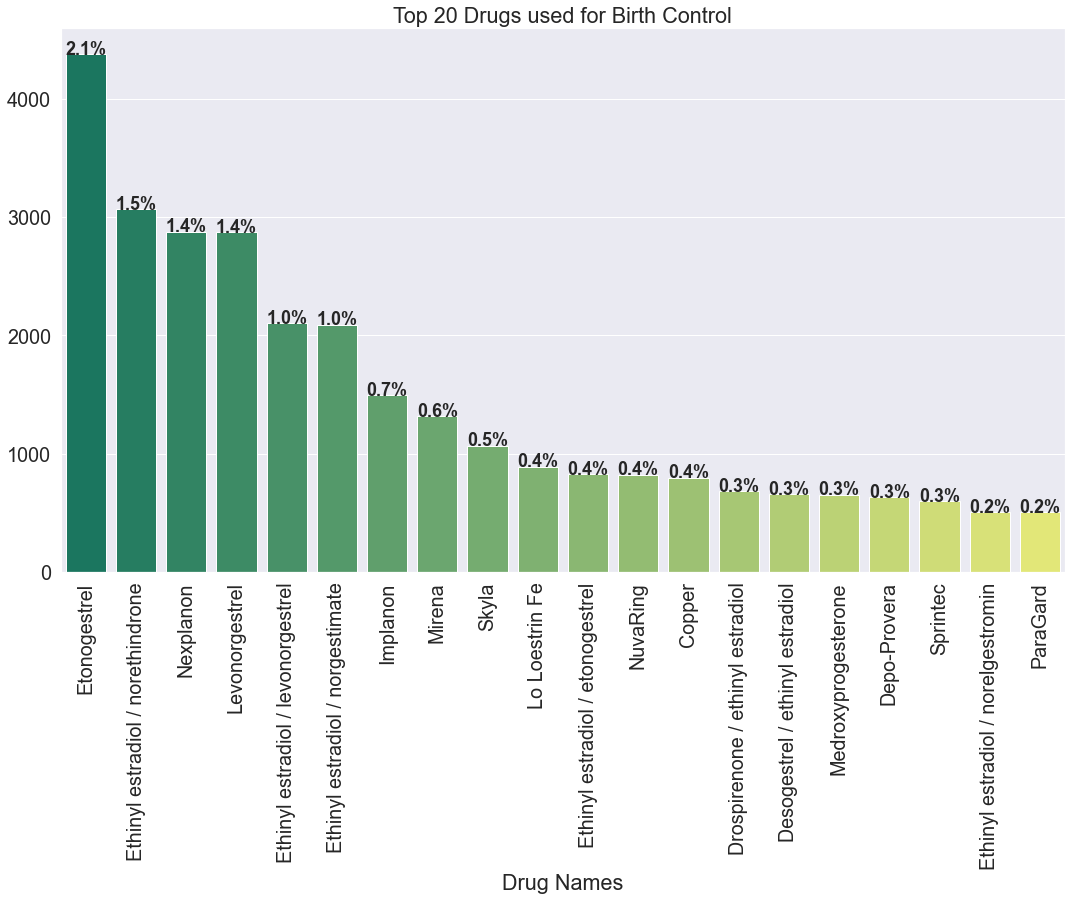

In [116]:
# Top 10 drugs which are used for the top condition, that is Birth Control
birth_control = df[df['condition'] == 'Birth Control']['drugName'].value_counts()[0: 20]
sns.set(font_scale = 1.8, style = 'darkgrid')

sns_ = sns.barplot(x = birth_control.index, y = birth_control.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 20 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90)
for x in sns_.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

In [117]:
# It can be inferred that drugs such as Etonogestrel, Ethinyl Estradiol/Norethindrome, Nexplanon, 
# Levonorgestrel, Ethinyl estradiol/levonorgestrel, Ethinyl estradiol/norgestimate, Implanon etc are 
# some of the drugs that are prone to adverse drug reaction for the control of birth

# Top 20 Commonly Used Drugs For Depression

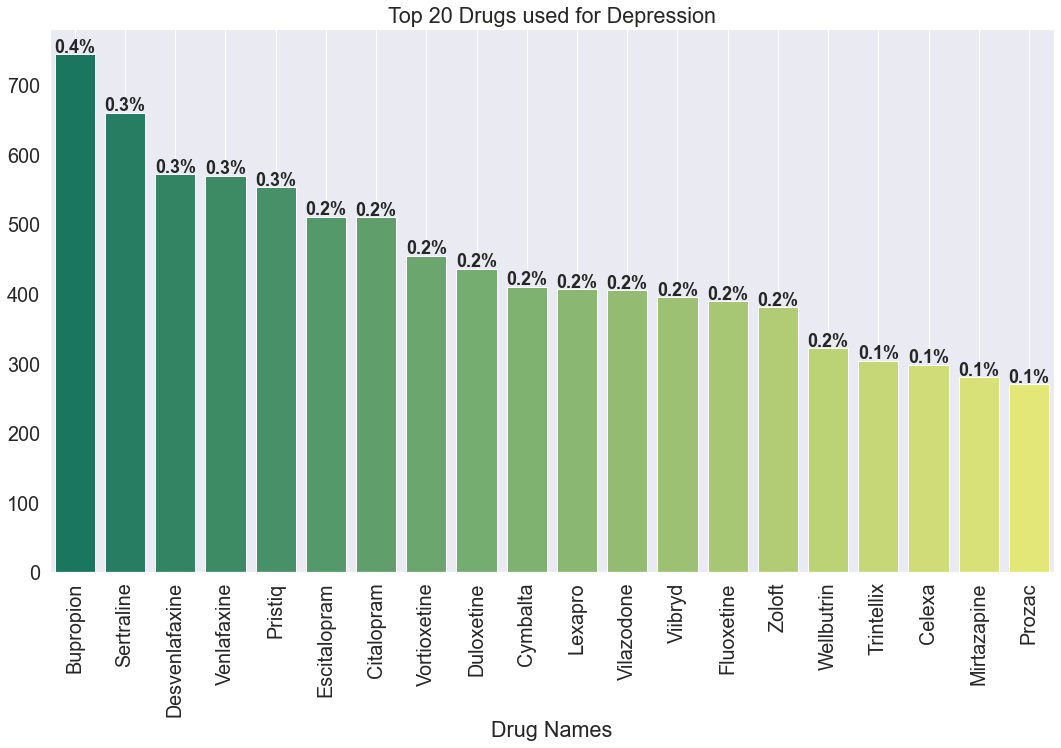

In [118]:
# Top 10 drugs which are used for second top condition, that is Depression
depression = df[df['condition'] == 'Depression']['drugName'].value_counts()[0: 20]
sns.set(font_scale = 1.8, style = 'darkgrid')

sns_ = sns.barplot(x = depression.index, y = depression.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 20 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90)
for x in sns_.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.grid()
plt.show()

In [119]:
# It can be inferred that drugs such as Bupropion, Sertraline, Desvenlafaxine,Venlafaxine, Pristiq,Escitalopram etc 
# are some of the drugs that are prone to adverse drug reaction for the treatment of depression

# Top 20 Commonly Used Drugs For Pain

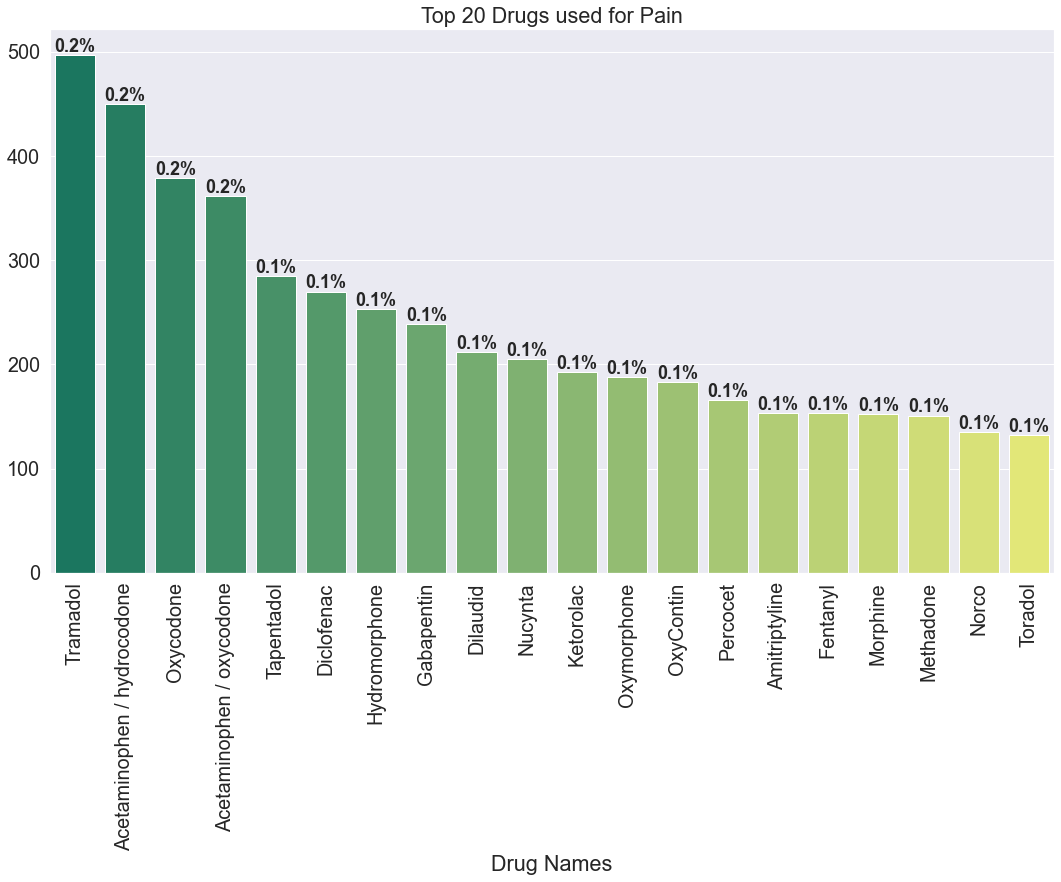

In [120]:
# Top 10 drugs which are used for second top condition, that is Depression
pain = df[df['condition'] == 'Pain']['drugName'].value_counts()[0: 20]
sns.set(font_scale = 1.8, style = 'darkgrid')

sns_ = sns.barplot(x = pain.index, y = pain.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 20 Drugs used for Pain")
plt.setp(sns_.get_xticklabels(), rotation = 90)
for x in sns_.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

In [121]:
# It can be inferred that drugs such as Tramadol, Acetaminophen/hydrocodone, Oxycodone, Acetaminophen/oxycodone,
# Tapentadol,Diclofenac,Hydromorphone, Gabapentin etc are some of the drugs that are prone to adverse drug reaction
# for the treatment of pain

In [122]:
# Determine the name of drugs mostly used for different health conditions

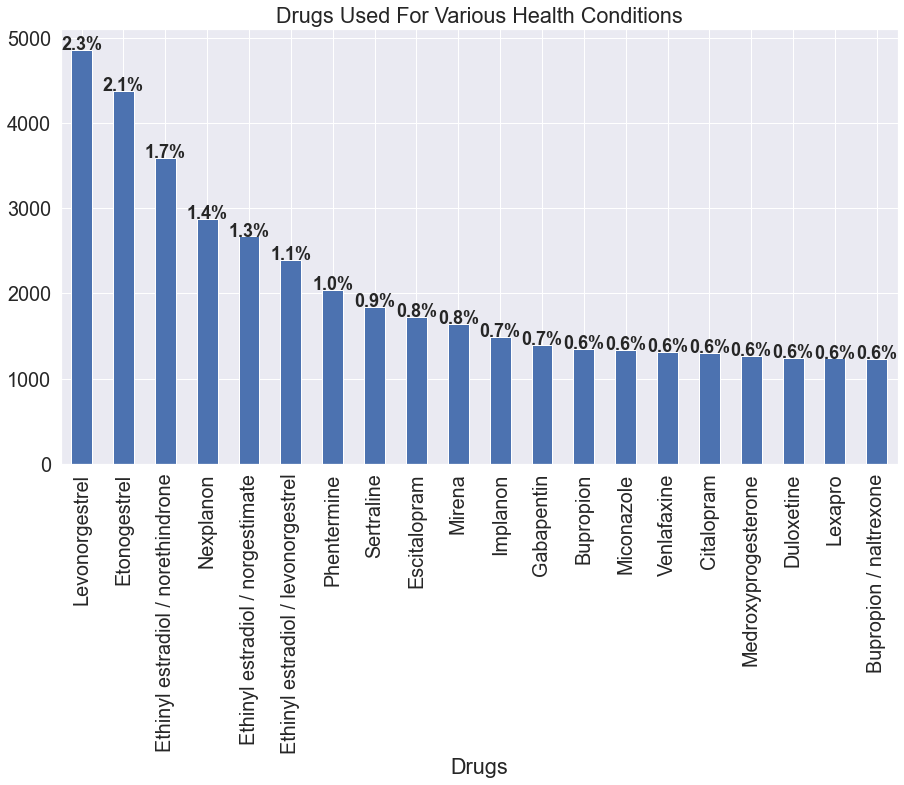

In [123]:
condition_drug = df.groupby('drugName')['condition'].size().nlargest(20).plot(kind='bar', figsize=(15,8))
plt.title('Drugs Used For Various Health Conditions')
plt.xlabel('Drugs')
for x in condition_drug.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

In [124]:
# The most common drugs used for various health conditions are Levonorgesterel, Etonogestrel,Ethinyl estradiol/norethindrone, 
# Nexplanon etc. as shown above 

# Visualize the commonest condition by drug use

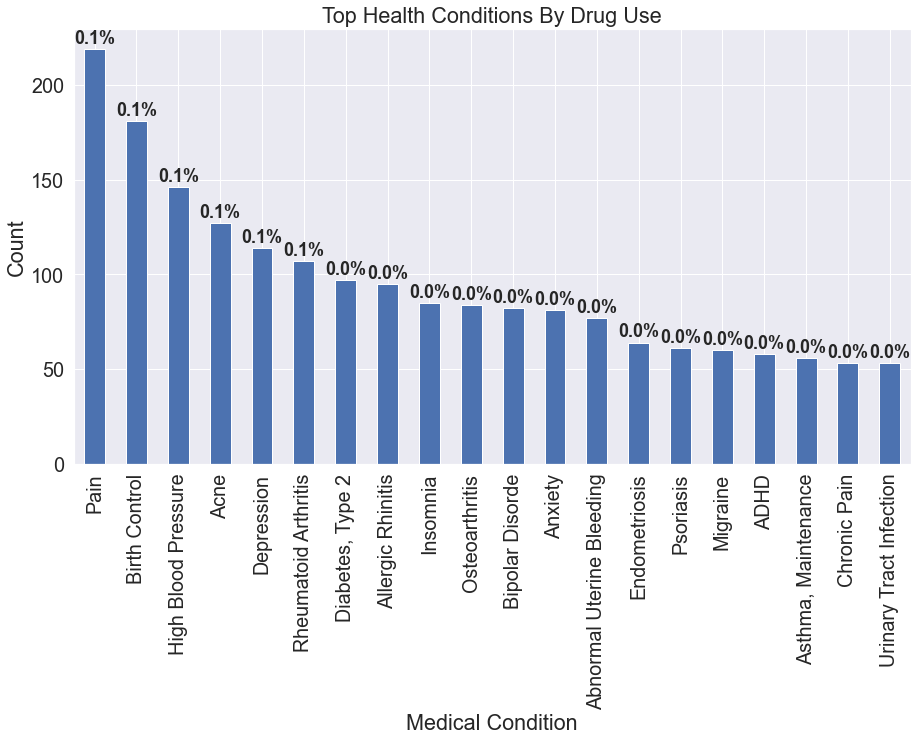

In [125]:
drug_use = df.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar', figsize=(15,8))
plt.ylabel('Count')
plt.xlabel('Medical Condition')
plt.title('Top Health Conditions By Drug Use')
for x in drug_use.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

In [126]:
# It can be inferred that Pain, Birth Control, High Blood Pressure, Acne, Depression, Rhematoid Arthritis, 
# Diabetes Type 2, Allergic Rhinitis are some of the conditions that are prone to drug abuse which can 
# cause adverse reaction

# Representation of Ratings 

In [127]:
df.rating.value_counts()

10.0    66866
9.0     36003
1.0     28467
8.0     24592
7.0     12315
5.0     10523
2.0      9083
3.0      8552
6.0      8295
4.0      6551
Name: rating, dtype: int64

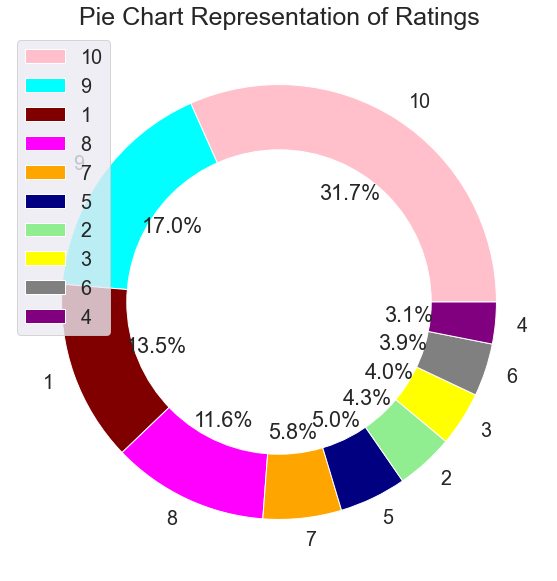

In [128]:
size = [66866, 36003,28467,24592,12315,10523,9083,8552,8295,6551]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow','grey','purple']
labels = "10", "9", "1", "8", "7","5","2","3","6","4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.1f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

# Distribution of rating

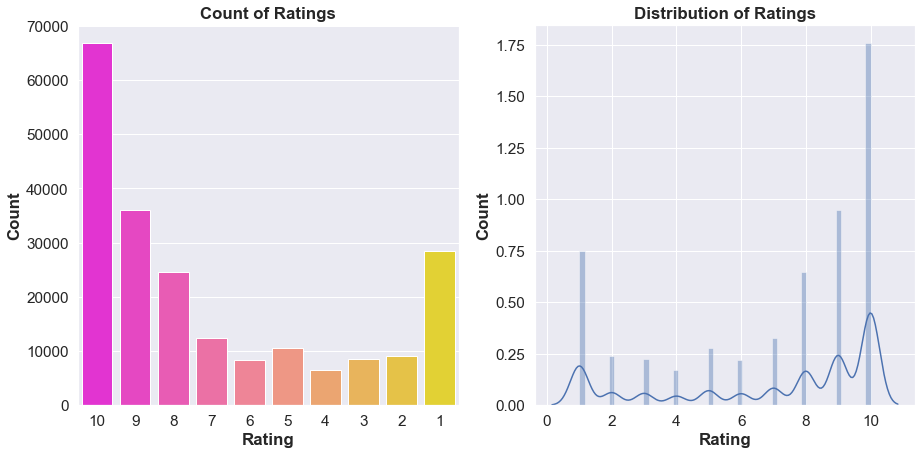

In [129]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [15,7]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings', weight='bold')
sns_1.set_xlabel("Rating", weight='bold')
sns_1.set_ylabel("Count", weight='bold')

sns_2.set_title('Distribution of Ratings',weight='bold')
sns_2.set_xlabel("Rating", weight='bold')
sns_2.set_ylabel("Count", weight='bold')
plt.show()

In [130]:
# Average Rating for Drugs

In [131]:
average_rating = df['rating'].groupby(df['drugName']).mean()

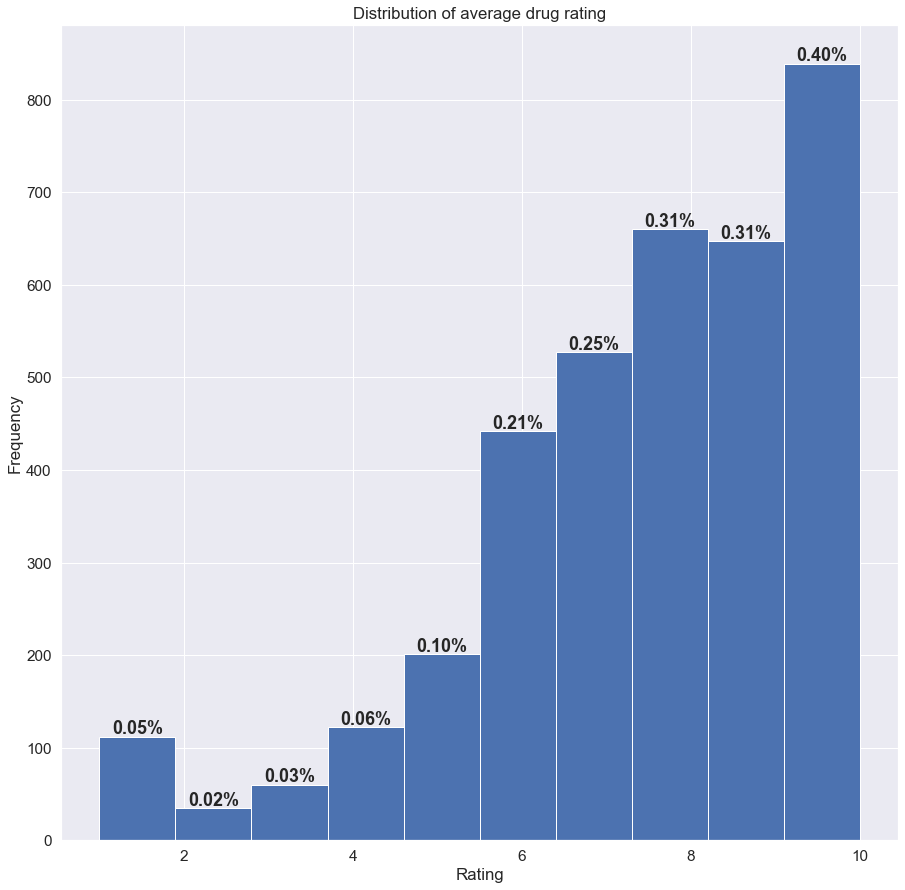

In [132]:
avg_rating = average_rating.plot(kind='hist',figsize=(15,15))
plt.title('Distribution of average drug rating')
plt.xlabel('Rating')
for x in avg_rating.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.2f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

In [133]:
# The above visual represents that 10 has the highest rating with 31.7%, followed by rating 9 with 17% 
# and rating 1 with 13.5% respectively

# Test the hypothesis that drugs with negative rating contribute significantly to adverse drug reaction

In [134]:
## Checking the statistics of positive drug rating to negative rating
postive_rating = df[df['rating']>=5]                      # Null Hypothesis
negative_rating= df[df['rating']<5]                       # ALternative Hypothesis
positive_rating_stat = postive_rating['drugName'].value_counts()
negative_rating_stat = negative_rating['drugName'].value_counts()


In [135]:
# function to check for significance of postive drug rating to negative drug rating

def pooled_std(pos, neg):
  pos_mean= pos.mean()
  neg_mean = neg.mean()
  pos_std = pos.std()
  neg_std = neg.std()

  pulled_std = (pos_std**2 +neg_std**2)**0.5
  # we calculate the significance at 95% confidence interval
  confidence = 2 * pulled_std

  if pos_mean >= pulled_std:
    return "Significant at 95% confidence interval"
  else:
    return "Not significant at 95% confidence interval"

In [136]:
# Function to determine the significant of postive drug rating to adverse drug reaction
significance_confirm = pooled_std(postive_rating.rating,negative_rating.rating)
print(f'Postive drug rating is highly {significance_confirm} to drug abuse which often results to adverse reaction')

Postive drug rating is highly Significant at 95% confidence interval to drug abuse which often results to adverse reaction


# Testing the hypothesis of frequently used drugs against least used drugs for adverse reaction

In [137]:
## Function to determine the p-value and Z value
from math import sqrt
from scipy.stats import norm, stats
def Zteststat(a1, b2, meandiff, std1, std2,num1,num2):   
  pooledSE = sqrt(std1**2/num1 +std2**2 /num2)
  z = ((a1 - b2)- meandiff)/pooledSE
  pvals = 2*(norm.sf(abs(z)))
  return round(z,2), pvals

In [138]:
# Extracting the mean value for positve and negative drug rating

In [139]:
positive_rating_average = positive_rating_stat.mean()
negative_rating_average = negative_rating_stat .mean()
print( f" The average for positive and negative drugs rating are: {round(positive_rating_average,2), round(negative_rating_average,2)} respectively")

 The average for positive and negative drugs rating are: (45.64, 23.54) respectively


In [140]:
# Extracting the standard deviation of positive and negative drug rating

In [141]:
std_positive = positive_rating_stat.std()
std_negative = negative_rating_stat.std()
print( f" The Standard Deviation for positive and negative drugs rating are: {round(std_positive,2), round(std_negative,2)} respectively")

 The Standard Deviation for positive and negative drugs rating are: (156.73, 82.3) respectively


In [142]:
# Statistics of Drugs Rating

In [143]:
# we get the total accidents for the week 
pos_sum = positive_rating_stat.sum()
neg_sum = negative_rating_stat.sum()
# pos_sum, neg_sum
print ("Postive drugs had ", round(pos_sum-neg_sum), " more than negative drugs" )

Postive drugs had  105941  more than negative drugs


In [144]:
# Apply Ztest function to extract the Z and P-values

In [145]:
z, p = Zteststat(negative_rating_average,positive_rating_average,0,std_negative,std_positive,neg_sum,pos_sum) # set the mean difference to zero (meaning there is no impact)
print(f'The result of Z is {z} P_value test is {p}')

The result of Z is -41.51 P_value test is 0.0


In [146]:
# Application of 2 sample T test function to compare result with the Z-test result

In [147]:
statistics_pvalue = stats.ttest_ind(a= positive_rating_stat, b=negative_rating_stat, equal_var=False) 
# equal_var - To determine if the sample of the distribution has equal variance

In [148]:
print(f'Statistics: {statistics_pvalue.statistic} and pvalues = {statistics_pvalue.pvalue}')

Statistics: 6.955561654441918 and pvalues = 3.919161924837907e-12


In [149]:
# Since the P-value is less than 0.05 significant level, we fail to reject the null hypothesis that drugs with positve 
# rating contributes more significantly to adverse drug reaction. Therefore, drugs with negative rating  does not 
# contribute significantly to adverse drug reaction.

# Conclusively, it can be inferred based on the hypothesis test, visualization and the analysis provided above,  most drugs rated between 6 and 10 are assumed to be abused and play a key role in adverse drug reaction.

# The drugs with rating between 0 and 4 are assumed not to be abused and as such may not contribute significantly to adverse drug reaction.

# Determine the distribution of review per year

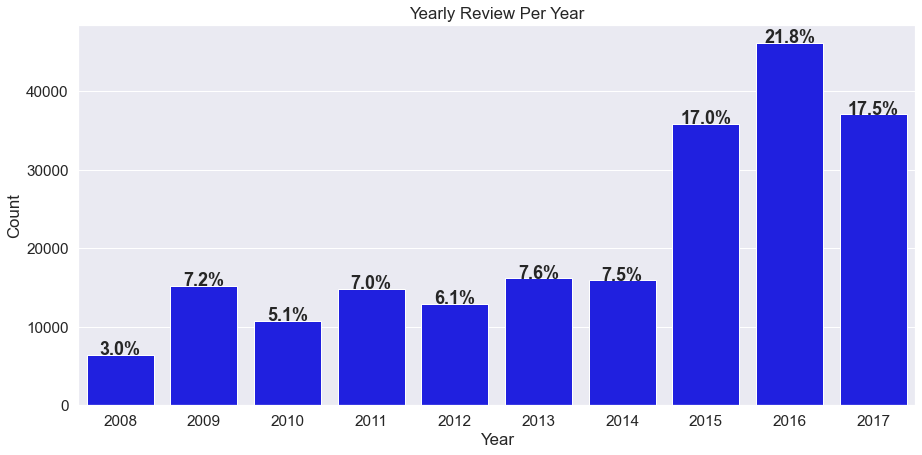

In [150]:
# plot number of reviews year wise

yearly_review = df['year'].value_counts().sort_index()
year_plot = sns.barplot(yearly_review.index,yearly_review.values,color='blue')
plt.title('Yearly Review Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
for x in year_plot.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

# Visualise average rating per year

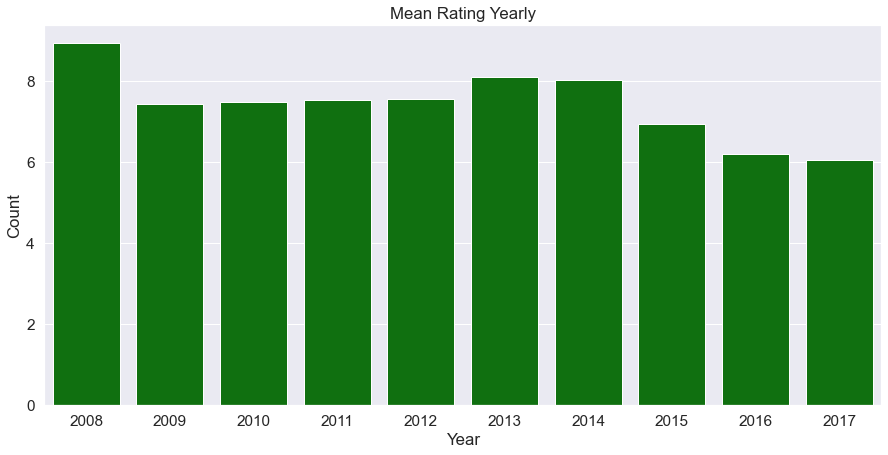

In [151]:
# check average rating per year
yearly_mean_rating = df.groupby('year')['rating'].mean()
year_mean = sns.barplot(yearly_mean_rating.index,yearly_mean_rating.values,color='green')
plt.title('Mean Rating Yearly')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Yearly Drug Distribution per condition

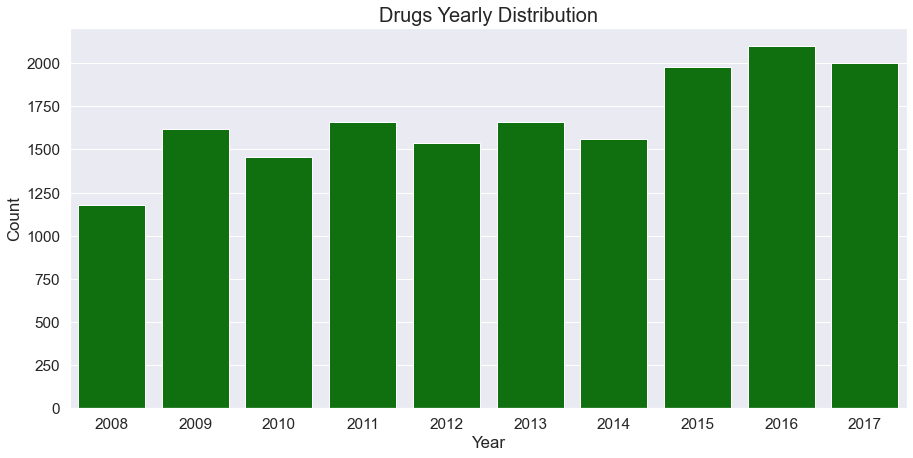

In [152]:
#check year wise drug counts and year wise conditions counts
year_wise_drug = df.groupby('year')['drugName'].nunique()
sns.barplot(year_wise_drug.index,year_wise_drug.values,color='green')
plt.title('Drugs Yearly Distribution',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 2016 was the year with highest drug rate with a 21.8% consumption rate whereas 2008 has the highest positive review

# Monthly Drugs Analysis

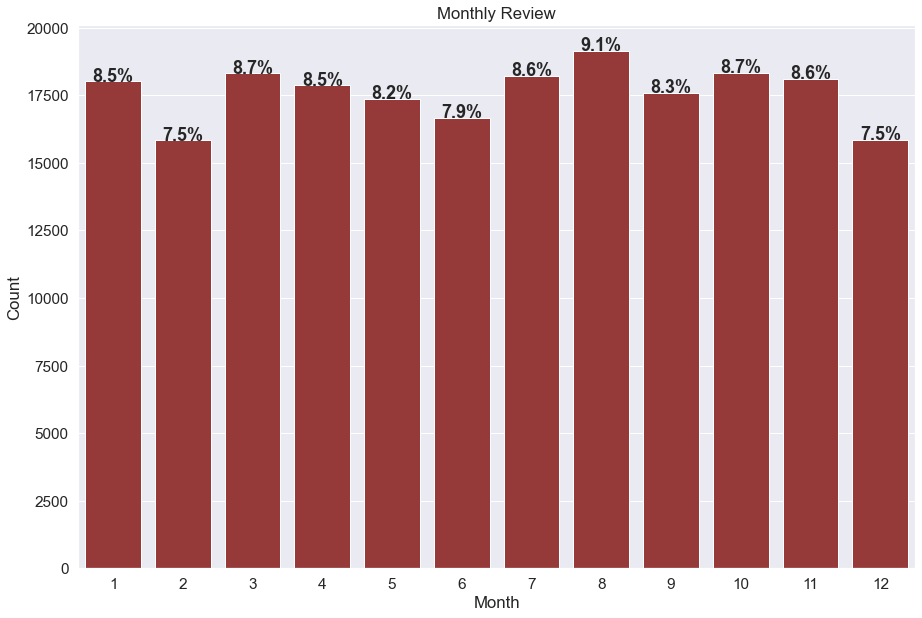

In [153]:
# plot number of reviews per month
plt.figure(figsize=(15,10))
month_review = df['month'].value_counts().sort_index()
month_plot = sns.barplot(month_review.index,month_review.values,color='brown')
plt.title('Monthly Review')
plt.xlabel('Month')
plt.ylabel('Count')
for x in month_plot.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

# August has the highest drug with 9.1% consumption rate and Levonorgestrel mostly used at 0.23%.

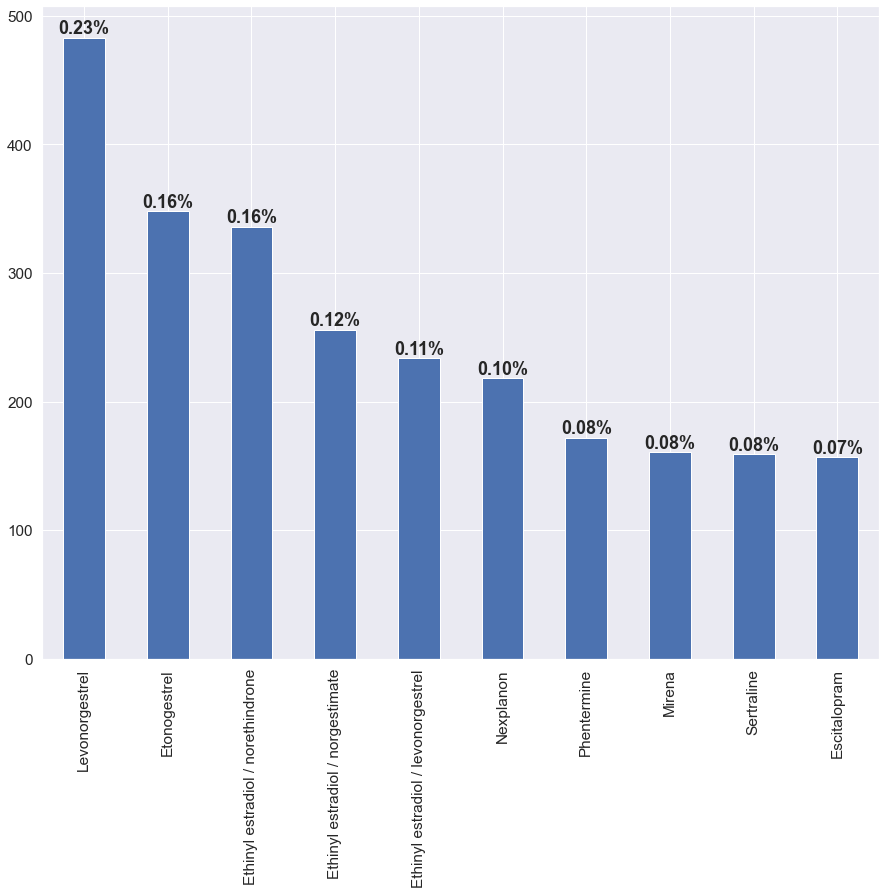

In [154]:
plt.figure(figsize=(15,12))
month_drug = df[df['month']==8]['drugName'].value_counts().nlargest(10).plot(kind='bar')
for x in month_drug.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.2f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')

# Visualization of daily drugs usage

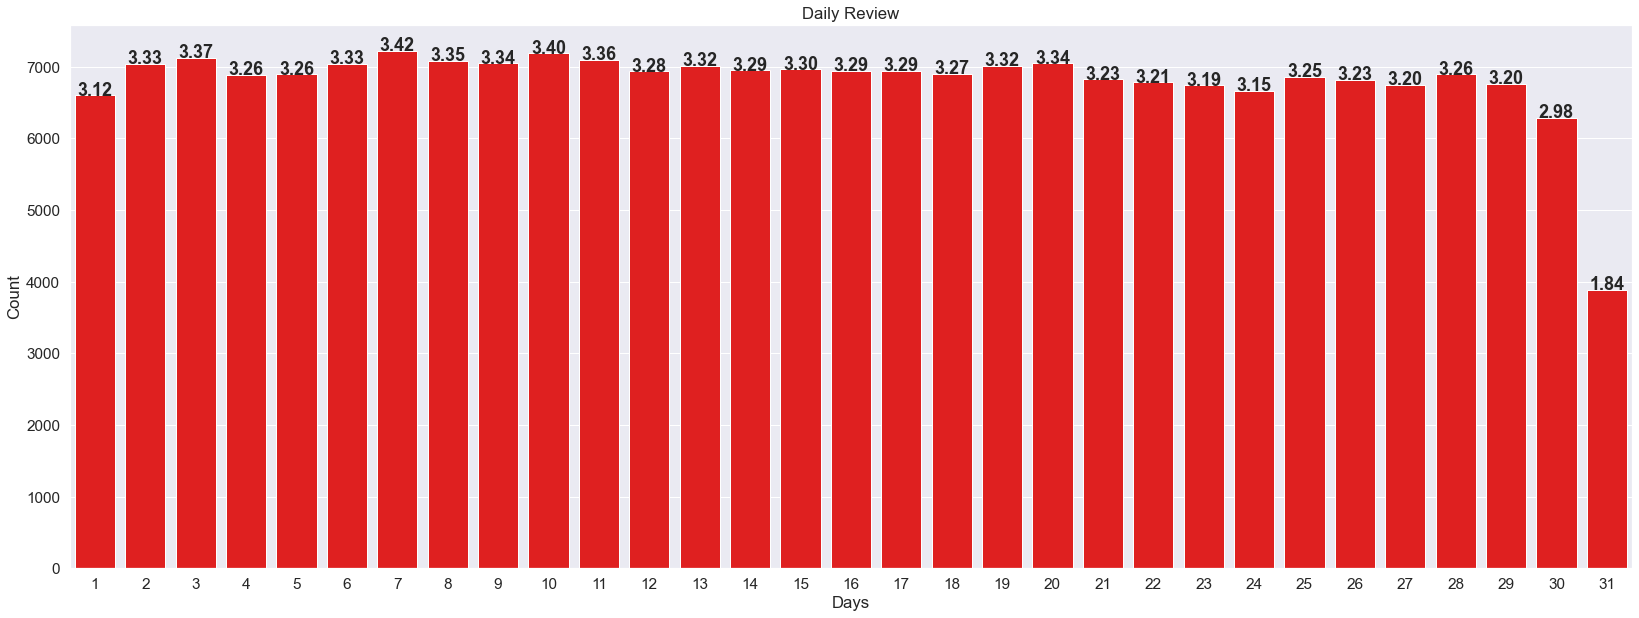

In [155]:
# plot number of reviews per day
plt.figure(figsize=(28,10))
daily_review = df['day'].value_counts().sort_index()
day_review = sns.barplot(daily_review.index,daily_review.values,color='red')
plt.title('Daily Review')
plt.xlabel('Days')
plt.ylabel('Count')
for x in day_review.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.2f}'.format((height/len(df))*100)+'',ha='center',weight='bold',size='18')
plt.show()

# Examine the  10 top drugs mostly used on every 7th of the month

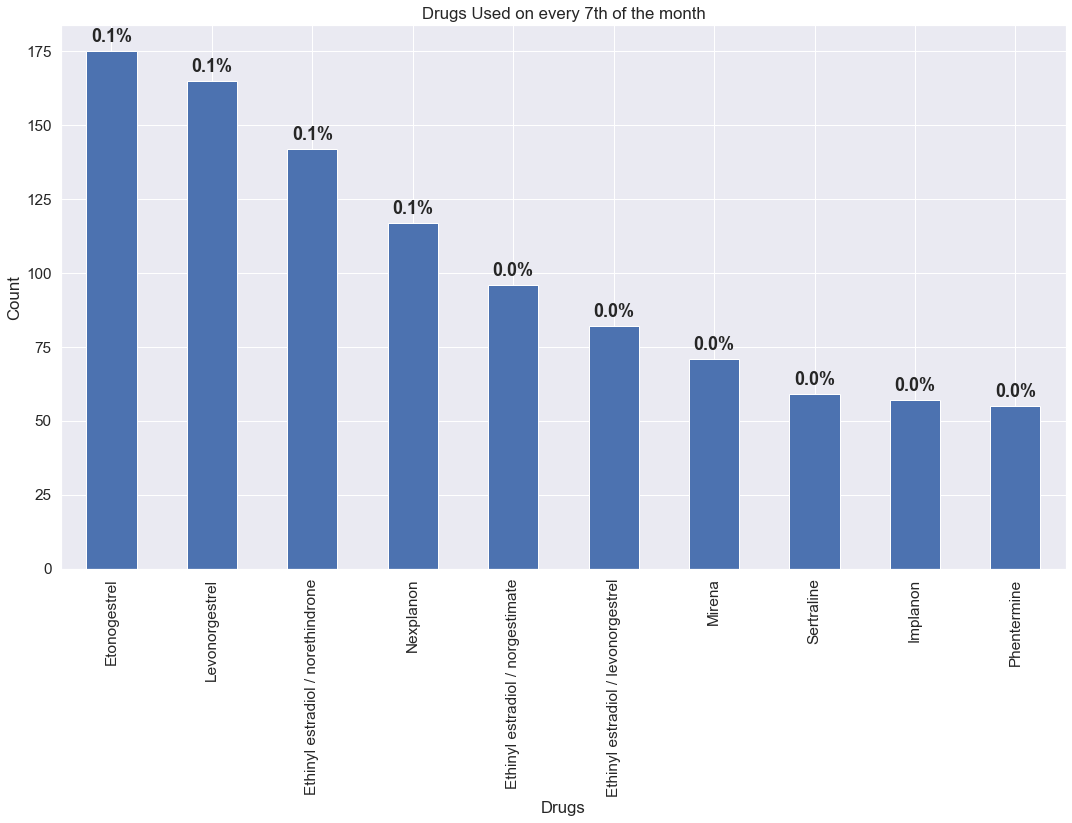

In [156]:
# Examine the highest drug consumption on every 7th
plt.figure(figsize=(18,10))
day_use = df[df['day']==7]['drugName'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Drugs Used on every 7th of the month')
plt.xlabel('Drugs')
plt.ylabel('Count')
for x in day_use.patches:
    height = x.get_height()
    plt.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center',weight='bold',size='18')
plt.show()

In [157]:
# Every 7th, the consumption of Etonogestrel, Levonogestrel, Ethinyl estradiol/nonrethindrone and Nexplanon is at 
# 0.1% daily use

In [158]:
df.to_csv('adverse drugs.csv')

# Split the dataset into 70% for training and 30% for testing

In [159]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42) 

In [160]:
vectorizer = TfidfVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, 
                             ngram_range=(4, 4),
                             max_features = 20000)
vectorizer

TfidfVectorizer(max_features=20000, min_df=2, ngram_range=(4, 4))

In [161]:
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [162]:
%time train_data_features = pipeline.fit_transform(df_train['review_clean'])
%time test_data_features = pipeline.fit_transform(df_test['review_clean'])

CPU times: total: 23.5 s
Wall time: 23.5 s
CPU times: total: 11.2 s
Wall time: 11.2 s


In [163]:
y_train = np.array(df_train['Rating_Label']).reshape(-1,1)
y_test = np.array(df_test['Rating_Label']).reshape(-1,1)

In [164]:
## Balancing of the dataset by the application of smoting
sm = SMOTE()
train_data_features, y_train = sm.fit_resample(train_data_features, y_train)
test_data_features, y_test = sm.fit_resample(test_data_features, y_test)

In [165]:
train_data_features.sort_indices()
test_data_features.sort_indices()

In [166]:
train_data_features.shape,y_train.shape

((212356, 20000), (212356,))

# Building the first model

In [167]:
# Early stopping when loss function is not achievable
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=8)

# Experiment the first model for use as a baseline model

In [168]:
# Model Structure
model = Sequential()

model.add(Dense(32, input_shape=(20000,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                640032    
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               3300      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 643,433
Trainable params: 643,433
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
425/425 [==============================] - 7s 13ms/step - loss: 0.5872 - accuracy: 0.6536 - val_loss: 0.9023 - val_accuracy: 0.5375
Epoch 2/10
425/425 [==============================] - 6s 12ms/step - loss: 0.4784 - accuracy: 0.7141 - val_loss: 1.1305 - val_accuracy: 0.5310
Epoch 3/10
425/425 [==============================] - 5s 12ms/step - loss: 0.4477 - accuracy: 0.7257 - val_loss: 1.3438 - val_accuracy: 0.5286
Epoch 4/10
425/425 [==============================] - 6s 13ms/step - loss: 0.4320 - accuracy: 0.7302 - val_loss: 1.4748 - val_accuracy: 0.5310
Epoch 5/10
425/425 [==============================] - 6s 13ms/step - loss: 0.4237 - accuracy: 0.7305 - val_loss: 1.5748 - val_accuracy: 0.5321
Epoch 6/10
425/425 [==============================] - 6s 12ms/step - loss: 0.4177 - accuracy: 0.7340 - val_loss: 1.6710 - val_accuracy: 0.5296
Epoch 7/10
425/425 [==============================] - 6s 13ms/step - loss: 0.4140 - accuracy: 0.7349 - val_loss: 1.7166 - val_accuracy: 0.5313

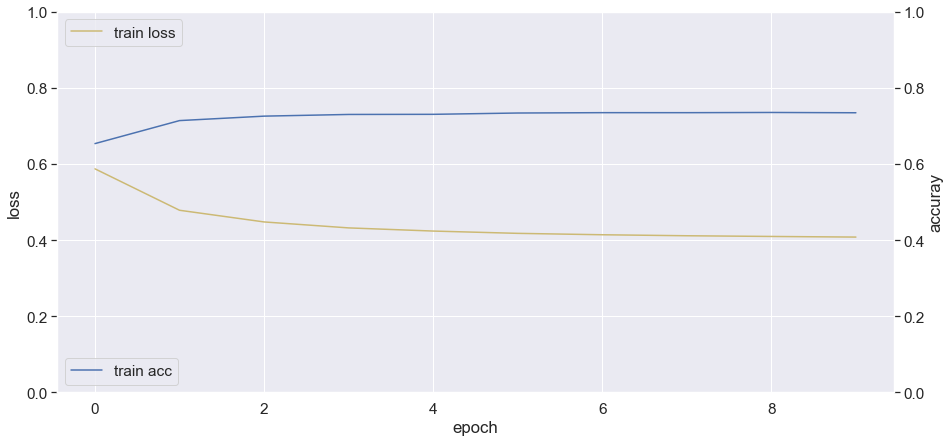

In [169]:
%time hist = model.fit(train_data_features, y_train,validation_data=(test_data_features,y_test), epochs=10, batch_size=500, callbacks=[es])
acc = hist.history['accuracy']
loss = hist.history['loss']
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(loss, 'y', label='train loss')
acc_ax.plot(acc, 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Experiment other models with embedding layer

In [170]:
# Importing cleaned data for new model experiment 
new_df = pd.read_csv('adverse drugs.csv')

In [171]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=8)

In [172]:

x = new_df['review_clean'].astype(str)
y = new_df['Rating_Label']

# Model Parameters
LENGTH = 50
N = len(x)   # Length of training feature variable
DEPTH = 300    # Output Dimension

# Read a part of the reviews and create training sequences (x_train)

samples = x.iloc[:N]
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
x_train_sec = pad_sequences(sequences, maxlen = LENGTH, padding='post')


# Convert the labels to one_hot_category values
one_hot_labels = to_categorical(y[:N], num_classes = 2)

In [173]:
# Examine the shape of train and test data

In [174]:
x_train_sec.shape,one_hot_labels.shape

((211247, 50), (211247, 2))

In [175]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train_sec,one_hot_labels, random_state=50,test_size=0.3) 

In [176]:
WORDS = np.amax(X_train)+1

In [177]:
X_train.shape,Y_train.shape

((147872, 50), (147872, 2))

# Experiment with Shallow Network(Supervised Learning)

# Building the first shallow network with KNeighbour Classifier Model

In [178]:
%time kc = KNeighborsClassifier().fit(X_train, Y_train)
print(f' Train score: {round(kc.score(X_train, Y_train), 2) * 100}')
print(f' Test score: {round(kc.score(X_test, Y_test), 2) * 100}')

CPU times: total: 31.2 ms
Wall time: 21.9 ms
 Train score: 81.0
 Test score: 72.0


# Building the second shallow network with XGB Classifier Model

In [179]:
%time xgb = XGBClassifier().fit(X_train, Y_train)
print(f' Train score: {round(xgb.score(X_train, Y_train), 2) * 100}')
print(f' Train score: {round(xgb.score(X_test, Y_test), 2) * 100}')

CPU times: total: 3min 2s
Wall time: 49.1 s
 Train score: 81.0
 Train score: 78.0


# Building the third shallow network with Decision Tree Classifier Model

In [180]:
%time tree = DecisionTreeClassifier().fit(X_train, Y_train)
print(f' Train score: {round(tree.score(X_train, Y_train), 2) * 100}')
print(f' Test score: {round(tree.score(X_test, Y_test), 2) * 100}')

CPU times: total: 8.95 s
Wall time: 8.92 s
 Train score: 100.0
 Test score: 85.0


# Building the fourth shallow network with Random Forest Classifier Model

In [181]:
%time forest = RandomForestClassifier().fit(X_train, Y_train)
print(f' Train score: {round(forest.score(X_train, Y_train), 2) * 100}')
print(f' Test score: {round(forest.score(X_test, Y_test), 2) * 100}')

CPU times: total: 1min 24s
Wall time: 1min 24s
 Train score: 100.0
 Test score: 89.0


# Experiment using Deep Neural Network

In [182]:
# Function to plot train and validation score

def plot_history(history):
    
    f, ax = plt.subplots(1, 2, figsize = (16, 7))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.sca(ax[0])
    plt.plot(epochs, acc, 'y', label='Training acc', color='blue')
    plt.plot(epochs, val_acc, 'b', label='Validation acc',color='red')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.sca(ax[1])
    plt.plot(epochs, loss, 'y', label='Training loss', color='blue')
    plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

# Function to train model

In [183]:
# training deep neural network

def train_model(model, x, y, e = 10, bs = 64, v = 1, vs = 0.3):
    h = model.fit(x, y, epochs = e, batch_size = bs, verbose = v, validation_split = vs, callbacks=[es])
    return h

# Building the second model with embedding layer

In [184]:
# Second Experiment with Embedding Layer and Hidden Layer
m0 = Sequential()
m0.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m0.add(Flatten())
m0.add(Dropout(0.1))
m0.add(Dense(32, activation = 'relu'))

m0.add(Dense(2, activation = 'softmax'))
m0.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           300000    
                                                                 
 flatten (Flatten)           (None, 15000)             0         
                                                                 
 dropout_1 (Dropout)         (None, 15000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                480032    
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 780,098
Trainable params: 780,098
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1618/1618 [==============================] - 49s 30ms/step - loss: 0.3853 - acc: 0.8260 - val_loss: 0.3651 - val_acc: 0.8385
Epoch 2/10
1618/1618 [==============================] - 48s 30ms/step - loss: 0.2869 - acc: 0.8786 - val_loss: 0.3505 - val_acc: 0.8544
Epoch 3/10
1618/1618 [==============================] - 48s 30ms/step - loss: 0.2052 - acc: 0.9166 - val_loss: 0.4060 - val_acc: 0.8554
Epoch 4/10
1618/1618 [==============================] - 49s 30ms/step - loss: 0.1466 - acc: 0.9414 - val_loss: 0.4704 - val_acc: 0.8622
Epoch 5/10
1618/1618 [==============================] - 49s 30ms/step - loss: 0.1096 - acc: 0.9557 - val_loss: 0.5715 - val_acc: 0.8659
Epoch 6/10
1618/1618 [==============================] - 49s 30ms/step - loss: 0.0858 - acc: 0.9658 - val_loss: 0.6784 - val_acc: 0.8659
Epoch 7/10
1618/1618 [==============================] - 49s 30ms/step - loss: 0.0725 - acc: 0.9715 - val_loss: 0.7146 - val_acc: 0.8675
Epoch 8/10
1618/1618 [==========================

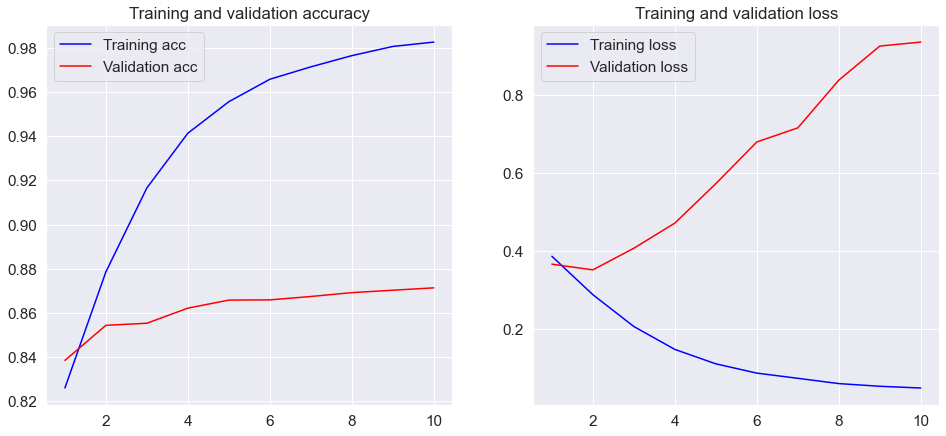

In [185]:
# Training the model for the first experiment
%time h0 = train_model(m0, X_train, Y_train)
plot_history(h0)

# Experiment second model with Embedding, LSTM, Dense classifier and 20% dropout

In [186]:
# Third model: Embedding -> LSTM -> Dense classifier -> Dropout
m1 = Sequential()
m1.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m1.add(LSTM(DEPTH))
m1.add(Dense(128))
m1.add(Dropout(0.2))
m1.add(Dense(2, activation = 'softmax'))
m1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 300)           300000    
                                                                 
 lstm (LSTM)                 (None, 300)               721200    
                                                                 
 dense_5 (Dense)             (None, 128)               38528     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1,059,986
Trainable params: 1,059,986
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1618/1618 [==============================] - 644s 396ms/step - loss: 0.4115 - acc: 0.8171 - val_loss: 0.3709 - val_acc: 0.8371
Epoch 2/10
1618/1618 [==============================] - 638s 395ms/step - loss: 0.3513 - acc: 0.8479 - val_loss: 0.3617 - val_acc: 0.8452
Epoch 3/10
1618/1618 [==============================] - 635s 393ms/step - loss: 0.3226 - acc: 0.8628 - val_loss: 0.3394 - val_acc: 0.8518
Epoch 4/10
1618/1618 [==============================] - 636s 393ms/step - loss: 0.2980 - acc: 0.8731 - val_loss: 0.3307 - val_acc: 0.8567
Epoch 5/10
1618/1618 [==============================] - 637s 394ms/step - loss: 0.2716 - acc: 0.8859 - val_loss: 0.3432 - val_acc: 0.8579
Epoch 6/10
1618/1618 [==============================] - 638s 394ms/step - loss: 0.2399 - acc: 0.9021 - val_loss: 0.3496 - val_acc: 0.8636
Epoch 7/10
1618/1618 [==============================] - 638s 394ms/step - loss: 0.2051 - acc: 0.9186 - val_loss: 0.3593 - val_acc: 0.8695
Epoch 8/10
1618/1618 [============

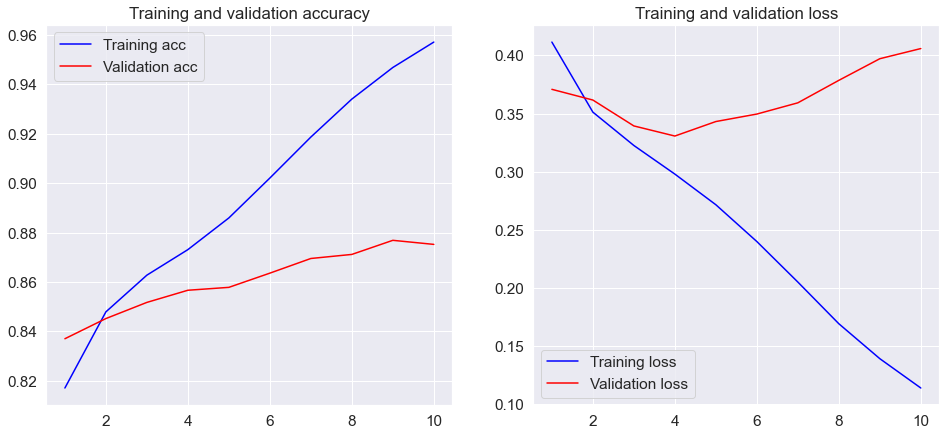

In [187]:
# Train third model with Embedding--> LSTM-->Hidden Layer-->Dropout--> Dense Classifier
%time h1 = train_model(m1, X_train, Y_train)
plot_history(h1)

In [188]:
eva1 = m1.evaluate(X_test,Y_test)

1981/1981 [==============================] - 193s 97ms/step - loss: 0.4031 - acc: 0.8776


In [189]:
eva1

[0.40312084555625916, 0.8776015639305115]

In [190]:
# Experiment fourth model with Embedding and GRU

In [191]:
from keras.layers import GRU

# Fourth model: Embedding -> GRU -> Dense classifier
m2 = Sequential()
m2.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m2.add(GRU(LENGTH))
m2.add(Dense(2, activation = 'softmax'))
m2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 300)           300000    
                                                                 
 gru (GRU)                   (None, 50)                52800     
                                                                 
 dense_7 (Dense)             (None, 2)                 102       
                                                                 
Total params: 352,902
Trainable params: 352,902
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1618/1618 [==============================] - 89s 53ms/step - loss: 0.4048 - acc: 0.8192 - val_loss: 0.3638 - val_acc: 0.8383
Epoch 2/10
1618/1618 [==============================] - 84s 52ms/step - loss: 0.3412 - acc: 0.8493 - val_loss: 0.3470 - val_acc: 0.8460
Epoch 3/10
1618/1618 [==============================] - 84s 52ms/step - loss: 0.3123 - acc: 0.8646 - val_loss: 0.3345 - val_acc: 0.8539
Epoch 4/10
1618/1618 [==============================] - 85s 52ms/step - loss: 0.2885 - acc: 0.8753 - val_loss: 0.3294 - val_acc: 0.8567
Epoch 5/10
1618/1618 [==============================] - 84s 52ms/step - loss: 0.2680 - acc: 0.8854 - val_loss: 0.3296 - val_acc: 0.8570
Epoch 6/10
1618/1618 [==============================] - 85s 53ms/step - loss: 0.2459 - acc: 0.8973 - val_loss: 0.3329 - val_acc: 0.8628
Epoch 7/10
1618/1618 [==============================] - 85s 53ms/step - loss: 0.2234 - acc: 0.9085 - val_loss: 0.3360 - val_acc: 0.8630
Epoch 8/10
1618/1618 [==========================

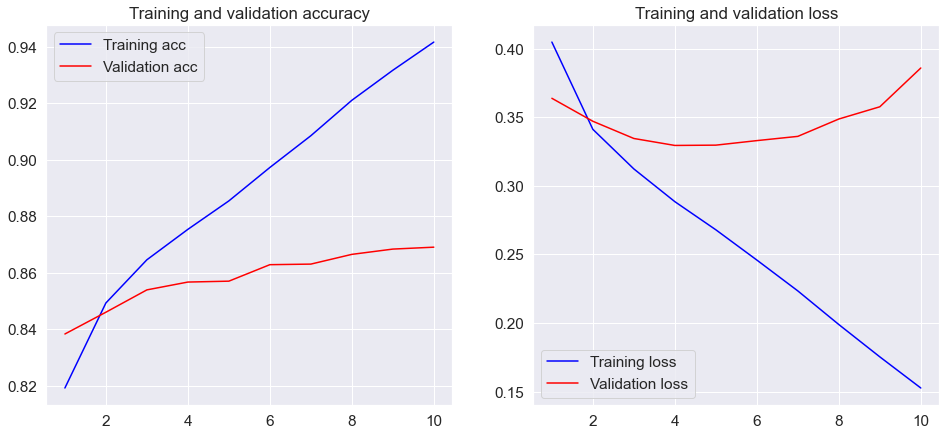

In [192]:
# Train the Fourth model with Embedding & GRU
%time h2 = train_model(m2,X_train, Y_train)
plot_history(h2)

In [193]:
eva2 = m2.evaluate(X_test,Y_test)

1981/1981 [==============================] - 22s 11ms/step - loss: 0.3793 - acc: 0.8714


In [194]:
eva2

[0.37934544682502747, 0.8713846206665039]

# Experiment fifth model using Embedding, Stack of GRU layers, Dense Classifier

In [195]:
# Fifth model: Embedding -> Stack of GRU layers -> Dense classifier
m3 = Sequential()
m3.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m3.add(GRU(DEPTH, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True))
m3.add(GRU(DEPTH, activation = 'relu', dropout = 0.2, recurrent_dropout = 0.2))
m3.add(Dense(2, activation = 'softmax'))
m3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 300)           300000    
                                                                 
 gru_1 (GRU)                 (None, 50, 300)           541800    
                                                                 
 gru_2 (GRU)                 (None, 300)               541800    
                                                                 
 dense_8 (Dense)             (None, 2)                 602       
                                                                 
Total params: 1,384,202
Trainable params: 1,384,202
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1618/1618 [==============================] - 2172s 1s/step - loss: 0.4008 - acc: 0.8219 - val_loss: 0.3623 - val_acc: 0.8401
Epoch 2/10
1618/1618 [==============================] - 2179s 1s/step - loss: 0.3337 - acc: 0.8537 - val_loss: 0.3323 - val_acc: 0.8539
Epoch 3/10
1618/1618 [==============================] - 2180s 1s/step - loss: 0.3038 - acc: 0.8686 - val_loss: 0.3226 - val_acc: 0.8584
Epoch 4/10
1618/1618 [==============================] - 2178s 1s/step - loss: 0.2788 - acc: 0.8811 - val_loss: 0.3139 - val_acc: 0.8636
Epoch 5/10
1618/1618 [==============================] - 2166s 1s/step - loss: 0.2523 - acc: 0.8939 - val_loss: 0.3159 - val_acc: 0.8689
Epoch 6/10
1618/1618 [==============================] - 2176s 1s/step - loss: 0.2210 - acc: 0.9084 - val_loss: 0.3246 - val_acc: 0.8644
Epoch 7/10
1618/1618 [==============================] - 2385s 1s/step - loss: 0.1932 - acc: 0.9215 - val_loss: 0.3289 - val_acc: 0.8795
Epoch 8/10
1618/1618 [==========================

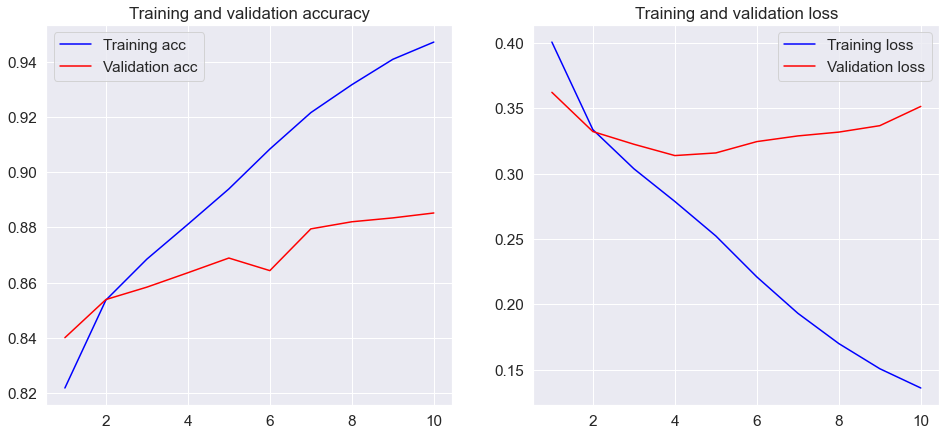

In [196]:
#Train the fifth model with Embedding--> Stack of GRU --> Dense Classifier
%time h3 = train_model(m3, X_train, Y_train)
plot_history(h3)

In [197]:
eva3 = m3.evaluate(X_test,Y_test)

1981/1981 [==============================] - 376s 190ms/step - loss: 0.3455 - acc: 0.8869


In [198]:
eva3

[0.34552666544914246, 0.886895477771759]

# Experimenting sixth model with Embedding, CONVID, MAXPOOLING, GRU

In [199]:
# Sixth model: Embedding ->  Embedding -> 2 x Conv1D + MaxPooling -> GRU -> Dense
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
m4 = Sequential()
m4.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m4.add(Conv1D(DEPTH, 5, activation = 'relu'))
m4.add(MaxPooling1D(4))
m4.add(Conv1D(DEPTH, 5, activation = 'relu'))
m4.add(GRU(DEPTH, dropout = 0.1, recurrent_dropout = 0.3))
m4.add(Dense(2, activation = 'softmax'))
m4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 300)           300000    
                                                                 
 conv1d (Conv1D)             (None, 46, 300)           450300    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 300)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 300)            450300    
                                                                 
 gru_3 (GRU)                 (None, 300)               541800    
                                                                 
 dense_9 (Dense)             (None, 2)                 602       
                                                      

Epoch 1/10
1618/1618 [==============================] - 474s 290ms/step - loss: 0.3912 - acc: 0.8234 - val_loss: 0.3621 - val_acc: 0.8369
Epoch 2/10
1618/1618 [==============================] - 483s 298ms/step - loss: 0.3160 - acc: 0.8640 - val_loss: 0.3298 - val_acc: 0.8590
Epoch 3/10
1618/1618 [==============================] - 476s 294ms/step - loss: 0.2560 - acc: 0.8954 - val_loss: 0.3222 - val_acc: 0.8709
Epoch 4/10
1618/1618 [==============================] - 482s 298ms/step - loss: 0.1824 - acc: 0.9298 - val_loss: 0.3234 - val_acc: 0.8771
Epoch 5/10
1618/1618 [==============================] - 530s 327ms/step - loss: 0.1186 - acc: 0.9566 - val_loss: 0.3826 - val_acc: 0.8827
Epoch 6/10
1618/1618 [==============================] - 517s 319ms/step - loss: 0.0802 - acc: 0.9716 - val_loss: 0.4099 - val_acc: 0.8809
Epoch 7/10
1618/1618 [==============================] - 502s 310ms/step - loss: 0.0618 - acc: 0.9779 - val_loss: 0.4538 - val_acc: 0.8840
Epoch 8/10
1618/1618 [============

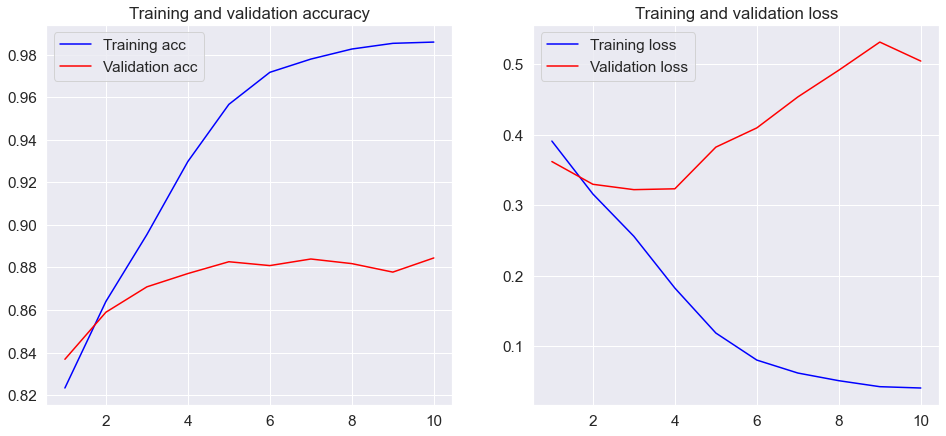

In [200]:
# Train the sixth model with Embedding--> CONV1D --> MAXPOOLING --> GLOBALMAXPOOLING1D--> Dense Classifier
%time h4 = train_model(m4,X_train,Y_train)
plot_history(h4)

In [201]:
eva4 = m4.evaluate(X_test,Y_test)

1981/1981 [==============================] - 59s 30ms/step - loss: 0.5033 - acc: 0.8859


In [202]:
eva4

[0.5033157467842102, 0.8859487175941467]

# Model Evaluation Selection

# Stack GRU MODEL is the recommended model for prediction for this project 

In [203]:
eva3 = m3.evaluate(X_test,Y_test)

1981/1981 [==============================] - 307s 155ms/step - loss: 0.3455 - acc: 0.8869


In [204]:
eva3

[0.34552666544914246, 0.886895477771759]

# Prediction & Recommendation

In [205]:
pred = np.argmax(m3.predict(X_test),axis=1)
Y_test_arg=np.argmax(Y_test,axis=1)
deep_class_report = classification_report(Y_test_arg, pred)
confuse_matrix = confusion_matrix(Y_test_arg, pred)

1981/1981 [==============================] - 296s 149ms/step


In [206]:
pred[X_test][0]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1], dtype=int64)

In [207]:
deep_class_report

'              precision    recall  f1-score   support\n\n           0       0.78      0.76      0.77     15842\n           1       0.92      0.93      0.93     47533\n\n    accuracy                           0.89     63375\n   macro avg       0.85      0.84      0.85     63375\nweighted avg       0.89      0.89      0.89     63375\n'

In [208]:
confuse_matrix

array([[11970,  3872],
       [ 3296, 44237]], dtype=int64)